In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **About:**

This dataset offers a comprehensive snapshot of criminal activities within the city. It encompasses various aspects of each incident, including date, time, location, victim demographics, and more.

# **Goal:**

By leveraging machine learning techniques, participants can analyze this rich dataset to predict crime categories, enhance law enforcement strategies, and bolster public safety measures.
Machine learning model must get a accuracy of 80% on the test data.

# **Columns information:**

1. Location: Location of the incident.
2. Cross_Street: Cross street near the incident.
3. Latitude: Latitude coordinate.
4. Longitude: Longitude coordinate.
5. Date_Reported: Date when the crime was reported.
6. Date_Occurred: Date when the crime occurred.
7. Time_Occurred: Time when the crime occurred.
8. Area_ID: ID of the area where the crime occurred.
9. Area_Name: Name of the area where the crime occurred.
10. Reporting_District_no: Reporting district number.
11. Part 1-2: Part classification of the crime (1 or 2).
12. Modus_Operandi: Method of operation used in the crime.
13. Victim_Age: Age of the victim.
14. Victim_Sex: Sex of the victim.
15. Victim_Descent: Descent of the victim.
16. Premise_Code: Code representing the type of premise where the crime occurred.
17.Premise_Description: Description of the premise.
18.Weapon_Used_Code: Code of the weapon used.
19.Weapon_Description: Description of the weapon used.
20.Status: Status of the investigation.
21. Status_Description: Description of the status.
22. Crime_Category: Category of the crime (target variable).

**Importing the Data & extracting basic information**

In [61]:
import pandas as pd
import numpy as np

In [62]:
train_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [63]:
train_df.head()

Location                     Cross_Street  \
0   4500    CARPENTER                    AV                              NaN   
1           45TH                         ST  ALAMEDA                      ST   
2    600 E  MARTIN LUTHER KING JR        BL                              NaN   
3  14900    ORO GRANDE                   ST                              NaN   
4   7100 S  VERMONT                      AV                              NaN   

   Latitude  Longitude           Date_Reported           Date_Occurred  \
0   34.1522  -118.3910  03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM   
1   34.0028  -118.2391  02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM   
2   34.0111  -118.2653  08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM   
3   34.2953  -118.4590  11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM   
4   33.9787  -118.2918  02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM   

   Time_Occurred  Area_ID    Area_Name  Reporting_District_no  ...  \
0         1800.0     15.0  N Hollywood                 1563.0  ...   
1         1345.0     13.0       Newton                 1367.0  ...   
2          605.0     13.0       Newton                 1343.0  ...   
3         1800.0     19.0      Mission                 1924.0  ...   
4         1130.0     12.0  77th Street                 1245.0  ...   

   Victim_Age Victim_Sex  Victim_Descent Premise_Code     Premise_Description  \
0        75.0          M               W        101.0                  STREET   
1        41.0          M               H        216.0               SWAP MEET   
2        67.0          M               B        501.0  SINGLE FAMILY DWELLING   
3        61.0          M               H        101.0                  STREET   
4         0.0          X               X        401.0               MINI-MART   

   Weapon_Used_Code                              Weapon_Description  Status  \
0               NaN                                             NaN      IC   
1             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   
2               NaN                                             NaN      IC   
3               NaN                                             NaN      IC   
4             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   

  Status_Description   Crime_Category  
0        Invest Cont  Property Crimes  
1        Invest Cont  Property Crimes  
2        Invest Cont  Property Crimes  
3        Invest Cont  Property Crimes  
4        Invest Cont  Property Crimes  

[5 rows x 22 columns]

In [64]:
test_df.head()

Location Cross_Street  Latitude  Longitude  \
0   1500    LEIGHTON                     AV          NaN   34.0128  -118.3045   
1    100 S  NORMANDIE                    AV          NaN   34.0726  -118.3029   
2    300 E  111TH                        ST          NaN   33.9348  -118.2695   
3   1300 S  LA BREA                      AV          NaN   34.0497  -118.3442   
4  11000    MORRISON                     ST          NaN   34.1611  -118.3704   

            Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0  03/03/2020 12:00:00 AM  03/03/2020 12:00:00 AM         2000.0      3.0   
1  06/01/2020 12:00:00 AM  04/25/2020 12:00:00 AM         1700.0     20.0   
2  08/28/2020 12:00:00 AM  08/27/2020 12:00:00 AM          900.0     18.0   
3  12/23/2020 12:00:00 AM  12/03/2020 12:00:00 AM         2200.0      7.0   
4  08/30/2020 12:00:00 AM  08/29/2020 12:00:00 AM          130.0     15.0   

     Area_Name  Reporting_District_no  ...                 Modus_Operandi  \
0    Southwest                  376.0  ...  0416 1241 1243 1813 1821 2000   
1      Olympic                 2014.0  ...                      0344 0394   
2    Southeast                 1844.0  ...  1822 0701 1914 0355 1202 0100   
3     Wilshire                  765.0  ...                            NaN   
4  N Hollywood                 1555.0  ...                           1501   

  Victim_Age  Victim_Sex Victim_Descent Premise_Code  \
0       28.0           F              H        501.0   
1       26.0           M              B        502.0   
2       62.0           F              B        721.0   
3        0.0         NaN            NaN        108.0   
4       37.0           F              W        501.0   

                            Premise_Description Weapon_Used_Code  \
0                        SINGLE FAMILY DWELLING            400.0   
1  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)              NaN   
2                                   HIGH SCHOOL              NaN   
3                                   PARKING LOT              NaN   
4                        SINGLE FAMILY DWELLING              NaN   

                               Weapon_Description Status Status_Description  
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC        Invest Cont  
1                                             NaN     IC        Invest Cont  
2                                             NaN     IC        Invest Cont  
3                                             NaN     IC        Invest Cont  
4                                             NaN     AO        Adult Other  

[5 rows x 21 columns]

In [65]:
train_df.shape,test_df.shape

((20000, 22), (5000, 21))

In [66]:
def Basic_info(data):
    output=pd.DataFrame(columns=["count","missing","no_unique","dtype","mode","v_mode"])

    for col in data :
      output.loc[col]=[data[col].count(),
                      data[col].isna().sum(),
                      data[col].nunique(),
                      data[col].dtypes,
                      data[col].mode().values[0],
                      data[col].value_counts().max(),
                       ]

    return  output

In [67]:
Basic_info(train_df)

count  missing  no_unique    dtype  \
Location               20000        0      12399   object   
Cross_Street            3448    16552       1495   object   
Latitude               20000        0       3622  float64   
Longitude              20000        0       3578  float64   
Date_Reported          20000        0        811   object   
Date_Occurred          20000        0        366   object   
Time_Occurred          20000        0        996  float64   
Area_ID                20000        0         21  float64   
Area_Name              20000        0         21   object   
Reporting_District_no  20000        0       1120  float64   
Part 1-2               20000        0          2  float64   
Modus_Operandi         17259     2741      10489   object   
Victim_Age             20000        0        100  float64   
Victim_Sex             17376     2624          4   object   
Victim_Descent         17376     2624         17   object   
Premise_Code           20000        0        217  float64   
Premise_Description    19995        5        216   object   
Weapon_Used_Code        7335    12665         57  float64   
Weapon_Description      7335    12665         57   object   
Status                 20000        0          5   object   
Status_Description     20000        0          5   object   
Crime_Category         20000        0          6   object   

                                                                 mode  v_mode  
Location                                                          6TH      33  
Cross_Street                                                 BROADWAY      56  
Latitude                                                      34.2012      90  
Longitude                                                   -118.2739     168  
Date_Reported                                  07/13/2020 12:00:00 AM      87  
Date_Occurred                                  01/01/2020 12:00:00 AM     137  
Time_Occurred                                                  1200.0     850  
Area_ID                                                          12.0    1345  
Area_Name                                                 77th Street    1345  
Reporting_District_no                                           645.0      99  
Part 1-2                                                          1.0   11637  
Modus_Operandi                                                   0344     826  
Victim_Age                                                        0.0    4828  
Victim_Sex                                                          M    8538  
Victim_Descent                                                      H    6143  
Premise_Code                                                    101.0    5033  
Premise_Description                                            STREET    5033  
Weapon_Used_Code                                                400.0    3990  
Weapon_Description     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990  
Status                                                             IC   15236  
Status_Description                                        Invest Cont   15236  
Crime_Category                                        Property Crimes   11666

In [68]:
Basic_info(test_df)

count  missing  no_unique    dtype  \
Location                5000        0       4165   object   
Cross_Street             810     4190        547   object   
Latitude                5000        0       2141  float64   
Longitude               5000        0       2213  float64   
Date_Reported           5000        0        514   object   
Date_Occurred           5000        0        366   object   
Time_Occurred           5000        0        517  float64   
Area_ID                 5000        0         21  float64   
Area_Name               5000        0         21   object   
Reporting_District_no   5000        0       1017  float64   
Part 1-2                5000        0          2  float64   
Modus_Operandi          4316      684       2961   object   
Victim_Age              5000        0         94  float64   
Victim_Sex              4357      643          4   object   
Victim_Descent          4357      643         16   object   
Premise_Code            5000        0        146  float64   
Premise_Description     4999        1        145   object   
Weapon_Used_Code        1847     3153         53  float64   
Weapon_Description      1847     3153         53   object   
Status                  5000        0          5   object   
Status_Description      5000        0          5   object   

                                                                 mode  v_mode  
Location                              7TH                          ST      10  
Cross_Street                          FIGUEROA                     ST      12  
Latitude                                                      34.1016      31  
Longitude                                                   -118.2739      44  
Date_Reported                                  06/19/2020 12:00:00 AM      31  
Date_Occurred                                  01/01/2020 12:00:00 AM      27  
Time_Occurred                                                  1200.0     205  
Area_ID                                                          12.0     301  
Area_Name                                                 77th Street     301  
Reporting_District_no                                           162.0      29  
Part 1-2                                                          1.0    2930  
Modus_Operandi                                                   0344     199  
Victim_Age                                                        0.0    1188  
Victim_Sex                                                          M    2121  
Victim_Descent                                                      H    1536  
Premise_Code                                                    101.0    1257  
Premise_Description                                            STREET    1257  
Weapon_Used_Code                                                400.0    1003  
Weapon_Description     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    1003  
Status                                                             IC    3830  
Status_Description                                        Invest Cont    3830

In [70]:
date_format = '%m/%d/%Y %I:%M:%S %p'
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'], format=date_format)
train_df['Date_Occurred'] = pd.to_datetime(train_df['Date_Occurred'], format=date_format)

In [71]:
train_df['Year_Reported'] = train_df['Date_Reported'].dt.year
train_df['Month_Reported'] = train_df['Date_Reported'].dt.month
train_df['Day_Reported'] = train_df['Date_Reported'].dt.day
train_df['Hour_Occurred'] = train_df['Time_Occurred']
train_df['Year_Occurred'] = train_df['Date_Occurred'].dt.year
train_df['Month_Occurred'] = train_df['Date_Occurred'].dt.month
train_df['Day_Occurred'] = train_df['Date_Occurred'].dt.day

In [72]:
Basic_info(train_df)

count  missing  no_unique           dtype  \
Location               20000        0      12399          object   
Cross_Street            3448    16552       1495          object   
Latitude               20000        0       3622         float64   
Longitude              20000        0       3578         float64   
Date_Reported          20000        0        811  datetime64[ns]   
Date_Occurred          20000        0        366  datetime64[ns]   
Time_Occurred          20000        0        996         float64   
Area_ID                20000        0         21         float64   
Area_Name              20000        0         21          object   
Reporting_District_no  20000        0       1120         float64   
Part 1-2               20000        0          2         float64   
Modus_Operandi         17259     2741      10489          object   
Victim_Age             20000        0        100         float64   
Victim_Sex             17376     2624          4          object   
Victim_Descent         17376     2624         17          object   
Premise_Code           20000        0        217         float64   
Premise_Description    19995        5        216          object   
Weapon_Used_Code        7335    12665         57         float64   
Weapon_Description      7335    12665         57          object   
Status                 20000        0          5          object   
Status_Description     20000        0          5          object   
Crime_Category         20000        0          6          object   
Year_Reported          20000        0          5           int32   
Month_Reported         20000        0         12           int32   
Day_Reported           20000        0         31           int32   
Hour_Occurred          20000        0        996         float64   
Year_Occurred          20000        0          1           int32   
Month_Occurred         20000        0         12           int32   
Day_Occurred           20000        0         31           int32   

                                                                 mode  v_mode  
Location                                                          6TH      33  
Cross_Street                                                 BROADWAY      56  
Latitude                                                      34.2012      90  
Longitude                                                   -118.2739     168  
Date_Reported                                     2020-07-13 00:00:00      87  
Date_Occurred                                     2020-01-01 00:00:00     137  
Time_Occurred                                                  1200.0     850  
Area_ID                                                          12.0    1345  
Area_Name                                                 77th Street    1345  
Reporting_District_no                                           645.0      99  
Part 1-2                                                          1.0   11637  
Modus_Operandi                                                   0344     826  
Victim_Age                                                        0.0    4828  
Victim_Sex                                                          M    8538  
Victim_Descent                                                      H    6143  
Premise_Code                                                    101.0    5033  
Premise_Description                                            STREET    5033  
Weapon_Used_Code                                                400.0    3990  
Weapon_Description     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990  
Status                                                             IC   15236  
Status_Description                                        Invest Cont   15236  
Crime_Category                                        Property Crimes   11666  
Year_Reported                                                    2020   19177  
Month_Reported                                                

**Explortory Data Analysis [EDA]**

In [73]:
train_df.Crime_Category.value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [74]:
train_df.Victim_Age.value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [75]:
train_df.Victim_Age.unique()

array([75., 41., 67., 61.,  0., 50., 68., 22., 31., 46., 72., 26., 38.,
       37., 42., 40., 53., 60., 29., 13., 33., 27., 15., 23., 74., 63.,
       78., 51., 44., 34., 69., 36., 52., 25., 49., 48., 32., 18., 35.,
       24., 39., 16., 28., 47., 30., 64., 76.,  5., 58., 45., 57., 19.,
       55., 54., 21., 65., 17., 20., 77., 82., 56., -2., 84., 59., 43.,
        7., 70., 66., 62., 14., 80., 71., 81., 96., 12., 11.,  4., 83.,
       10.,  8.,  6., 88., 86., 73.,  9., 87., 85., 93., 95., 99., 79.,
        3.,  2., 91., 92., 90., 89., 98., -1., 94.])

In [76]:
def cross_table(data,col1,col2) :

      return pd.crosstab(data[col1],data[col2],margins=True)

In [77]:
cross_table(train_df,"Victim_Sex","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Victim_Sex                                                            
F                                  133                          888   
H                                    0                            0   
M                                   91                          768   
X                                    1                          152   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Victim_Sex                                                                     
F                                         623            49             3016   
H                                           1             0                1   
M                                         628            84             4721   
X                                          69            46             1339   
All                                      1321           179             9077   

Crime_Category  Violent Crimes    All  
Victim_Sex                             
F                         2467   7176  
H                            0      2  
M                         2246   8538  
X                           53   1660  
All                       4766  17376

Highest no of Property Crimes are done against Men.

Highest no of Violent Crimes are done against Women.

In [78]:
cross_table(train_df,"Victim_Descent","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Victim_Descent                                                        
A                                    3                           22   
B                                   51                          371   
C                                    0                            2   
D                                    0                            0   
F                                    0                            0   
G                                    0                            0   
H                                  140                          724   
I                                    0                            0   
J                                    0                            0   
K                                    0                            3   
O                                   11                          132   
P                                    0                            1   
U                                    0                            0   
V                                    0                            0   
W                                   19                          383   
X                                    1                          170   
Z                                    0                            0   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Victim_Descent                                                                 
A                                          45             2              266   
B                                         221            20             1124   
C                                          14             0               35   
D                                           0             0                1   
F                                           7             0               39   
G                                           0             0                1   
H                                         343            50             2556   
I                                           2             0                8   
J                                           5             0               10   
K                                          15             0               53   
O                                         142            18              994   
P                                           0             0                3   
U                                           0             0                2   
V                                           2             0                6   
W                                         451            40             2501   
X                                          74            49             1475   
Z                                           0             0                3   
All                                      1321           179             9077   

Crime_Category  Violent Crimes    All  
Victim_Descent                         
A                           89    427  
B                         1094   2881  
C                            0     51  
D                            0      1  
F                            2     48  
G                            0      1  
H                         2330   6143  
I                            1     11  
J                            1     16  
K                           12     83  
O                          306   1603  
P                            0      4  
U                            0      2  
V                            0      8  
W                          851   4245  
X                           80   1849  
Z                            0      3  
All                       4766  17376

Highest no of Property Crimes & Violent Crimes are done against Victim_Descent "H"

In [79]:
cross_table(train_df,"Weapon_Used_Code","Crime_Category")

Crime_Category    Crimes against Persons  Crimes against Public Order  \
Weapon_Used_Code                                                        
101.0                                  0                            7   
102.0                                 14                           76   
103.0                                  0                            1   
104.0                                  1                            1   
105.0                                  0                            0   
106.0                                  2                           57   
107.0                                  1                            8   
109.0                                  7                           24   
111.0                                  0                            1   
112.0                                  0                            2   
113.0                                  0                            8   
114.0                                  0                            8   
115.0                                  0                            1   
122.0                                  0                            0   
200.0                                  0                           47   
201.0                                  0                           11   
202.0                                  0                            0   
204.0                                  0                           11   
205.0                                  0                           20   
206.0                                  0                            2   
207.0                                  1                           39   
210.0                                  0                            1   
211.0                                  0                            3   
212.0                                  0                            3   
213.0                                  0                            0   
214.0                                  0                            0   
215.0                                  0                           11   
216.0                                  0                            1   
218.0                                  1                            3   
219.0                                  0                            3   
221.0                                  0                            0   
223.0                                  3                            0   
301.0                                 13                            1   
302.0                                  1                            0   
303.0                                  0                            0   
304.0                                  0                            7   
305.0                                  0                            0   
306.0                                  0                            0   
307.0                                  0                            0   
308.0                                  4                            1   
309.0                                  0                            1   
310.0                                  0                            3   
311.0                                  0                            1   
312.0                                  0                            5   
400.0                                115                           36   
500.0                                 12                           24   
501.0                                  0                            0   
503.0                                  0                            0   
504.0                                  0                            0   
506.0                                  0                            0   
508.0                                  0                            0   
510.0                                  0                            0   
511.0                                  3                  

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.mosaicplot as mplot

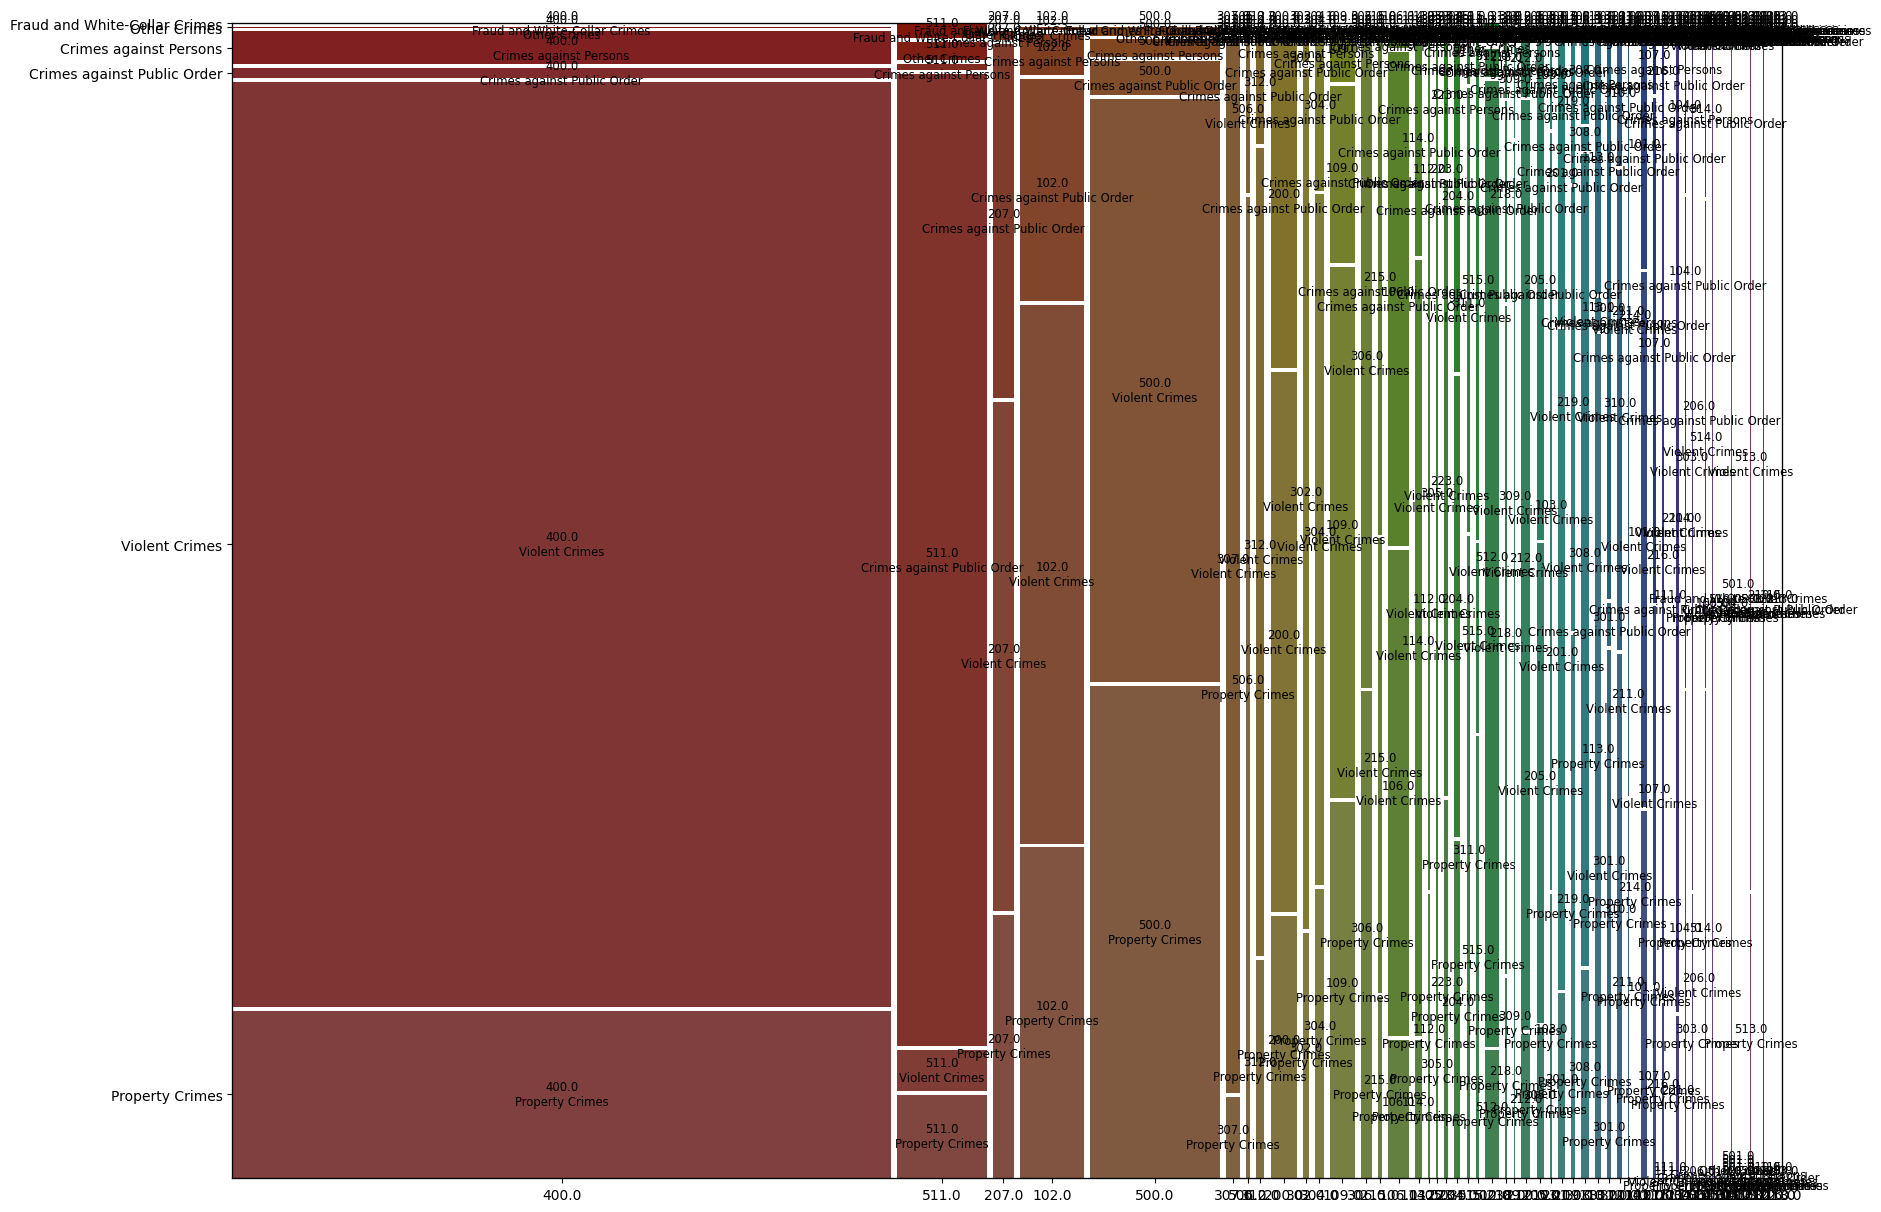

In [96]:
fig, ax = plt.subplots(figsize=(20, 15))
mplot.mosaic(train_df,["Weapon_Used_Code","Crime_Category"],ax=ax)
plt.show()

Hoghest no of Violent Crimes & Property Crimes are done using Weopen_used_code 400 which is STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)

In [92]:
cross_table(train_df,"Area_ID","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Area_ID                                                               
1.0                                  4                           89   
2.0                                  7                           80   
3.0                                 27                          107   
4.0                                 10                           64   
5.0                                 18                          101   
6.0                                  2                          114   
7.0                                 11                           86   
8.0                                  1                           72   
9.0                                 13                           73   
10.0                                10                           78   
11.0                                10                           70   
12.0                                18                          143   
13.0                                11                           83   
14.0                                 6                           75   
15.0                                 5                           99   
16.0                                12                           75   
17.0                                 7                           53   
18.0                                17                          115   
19.0                                14                           87   
20.0                                11                           69   
21.0                                11                           75   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Area_ID                                                                        
1.0                                        40            19              647   
2.0                                        56             3              517   
3.0                                        76             7              629   
4.0                                        37             4              440   
5.0                                        31             6              526   
6.0                                        71             7              580   
7.0                                        73            13              577   
8.0                                       105            12              607   
9.0                                        76             7              543   
10.0                                       72             7              475   
11.0                                       58             7              544   
12.0                                       70            14              646   
13.0                                       33             7              610   
14.0                                      104            13              757   
15.0                                       93            13              647   
16.0                                       49             7              424   
17.0                                       78             9              465   
18.0                                       42             6              535   
19.0                                       53             7              489   
20.0                                       56             4              569   
21.0                                       82             7              439   
All                                      1355           179            11666   

Crime_Category  Violent Crimes    All  
Area_ID                                
1.0                        357   1156  
2.0                        268    931  
3.0                        284   1130  
4.0                        200    755  
5.0                        190    872  
6.0                        240   1014  
7.0                        183    943  
8.0           

Highest no of Violent Crimes are done in Area_ID 12 and Property Crimes in 14

In [81]:
cross_table(train_df,"Status","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Status                                                                
AA                                  69                          323   
AO                                  80                          465   
IC                                  74                         1011   
JA                                   1                            6   
JO                                   1                            3   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Status                                                                         
AA                                         38            33              753   
AO                                         37            28              550   
IC                                       1279           117            10320   
JA                                          0             1               35   
JO                                          1             0                8   
All                                      1355           179            11666   

Crime_Category  Violent Crimes    All  
Status                                 
AA                         838   2054  
AO                        1437   2597  
IC                        2435  15236  
JA                          27     70  
JO                          30     43  
All                       4767  20000

Most of the Property Crimes are under Status "IC" which is Invest Cont

In [82]:
cross_table(train_df,"Year_Reported","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Year_Reported                                                         
2020                               194                         1762   
2021                                18                           36   
2022                                 5                           10   
2023                                 8                            0   
2024                                 0                            0   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Year_Reported                                                                  
2020                                      984           177            11391   
2021                                      189             2              229   
2022                                      101             0               34   
2023                                       74             0               12   
2024                                        7             0                0   
All                                      1355           179            11666   

Crime_Category  Violent Crimes    All  
Year_Reported                          
2020                      4669  19177  
2021                        58    532  
2022                        26    176  
2023                        14    108  
2024                         0      7  
All                       4767  20000

Most of the crimes Year_Reported is 2020

In [83]:
cross_table(train_df,"Month_Reported","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Month_Reported                                                        
1                                   22                          145   
2                                   35                          152   
3                                   20                          136   
4                                    9                          138   
5                                   14                          164   
6                                   17                          144   
7                                   12                          155   
8                                   19                          150   
9                                   27                          185   
10                                  24                          151   
11                                  11                          144   
12                                  15                          144   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Month_Reported                                                                 
1                                         141            11             1075   
2                                         148            16              982   
3                                         116            24              965   
4                                          97            14              938   
5                                         126            24             1028   
6                                         109            11              986   
7                                          92            14             1007   
8                                          93            16              951   
9                                          96            10              919   
10                                        120            14              954   
11                                        103            13              902   
12                                        114            12              959   
All                                      1355           179            11666   

Crime_Category  Violent Crimes    All  
Month_Reported                         
1                          430   1824  
2                          393   1726  
3                          364   1625  
4                          346   1542  
5                          398   1754  
6                          458   1725  
7                          410   1690  
8                          405   1634  
9                          426   1663  
10                         418   1681  
11                         376   1549  
12                         343   1587  
All                       4767  20000

Highest no of Property Crimes are reported in the 1st month & Violent Crime in 6th month.

In [84]:
cross_table(train_df,"Day_Reported","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Day_Reported                                                          
1                                   10                           55   
2                                    7                           62   
3                                    5                           54   
4                                    5                           65   
5                                   10                           59   
6                                    7                           54   
7                                    8                           43   
8                                    3                           63   
9                                   13                           58   
10                                   8                           72   
11                                   9                           59   
12                                   7                           55   
13                                   5                           59   
14                                  11                           54   
15                                  14                           48   
16                                   5                           74   
17                                   3                           63   
18                                   5                           65   
19                                   5                           47   
20                                   9                           70   
21                                   9                           52   
22                                  11                           60   
23                                   3                           73   
24                                   9                           45   
25                                  12                           52   
26                                   5                           73   
27                                   6                           56   
28                                  11                           74   
29                                   3                           68   
30                                   5                           55   
31                                   2                           21   
All                                225                         1808   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Day_Reported                                                                   
1                                          45            10              380   
2                                          48             5              373   
3                                          37             9              366   
4                                          60             3              409   
5                                          44             5              392   
6                                          39             7              384   
7                                          39             5              379   
8                                          40             3              370   
9                                          42             8              375   
10                                         45             3              391   
11                                         46            10              387   
12                                         50             3              373   
13                                         47             2              391   
14                                         38             3              379   
15                                         46             9              343   
16                                         48             4              393   
17                                         44             8              412   
18                                         45             5      

Highest no of Property Crimes are reported in the 21th day & Violent Crime in 5th day.

In [85]:
pd.set_option('display.max_rows', 300)
cross_table(train_df,"Premise_Code","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Premise_Code                                                          
101.0                               28                          247   
102.0                               11                           80   
103.0                                0                            8   
104.0                                1                           23   
107.0                                0                            1   
108.0                                5                           65   
109.0                                1                           13   
110.0                                0                            1   
111.0                                0                            0   
112.0                                0                            0   
116.0                                0                            2   
117.0                                0                            3   
118.0                                0                            5   
119.0                                0                            2   
120.0                                0                            0   
121.0                                3                           23   
122.0                                3                            2   
123.0                                0                            0   
124.0                                0                            2   
127.0                                0                            0   
128.0                                0                            1   
135.0                                0                            0   
138.0                                1                            0   
139.0                                0                            0   
140.0                                0                            0   
141.0                                0                            1   
142.0                                0                            0   
144.0                                0                            0   
145.0                                0                            0   
146.0                                0                            1   
148.0                                0                            0   
151.0                                0                            1   
152.0                                0                            2   
154.0                                0                            0   
156.0                                0                            0   
157.0                                0                            0   
158.0                                0                            0   
201.0                                0                            0   
202.0                                0                            3   
203.0                                1                           74   
205.0                                0                            0   
206.0                                0                            0   
207.0                                0                            1   
208.0                                0                            0   
209.0                                0                            1   
210.0                                1                            9   
212.0                                0                           17   
213.0                                0                            0   
214.0                                0                            0   
215.0                                0                            0   
216.0                                0                            0   
217.0                                0                            4   
218.0                                0                            1   
219.0                                0                            0   
220.0                   

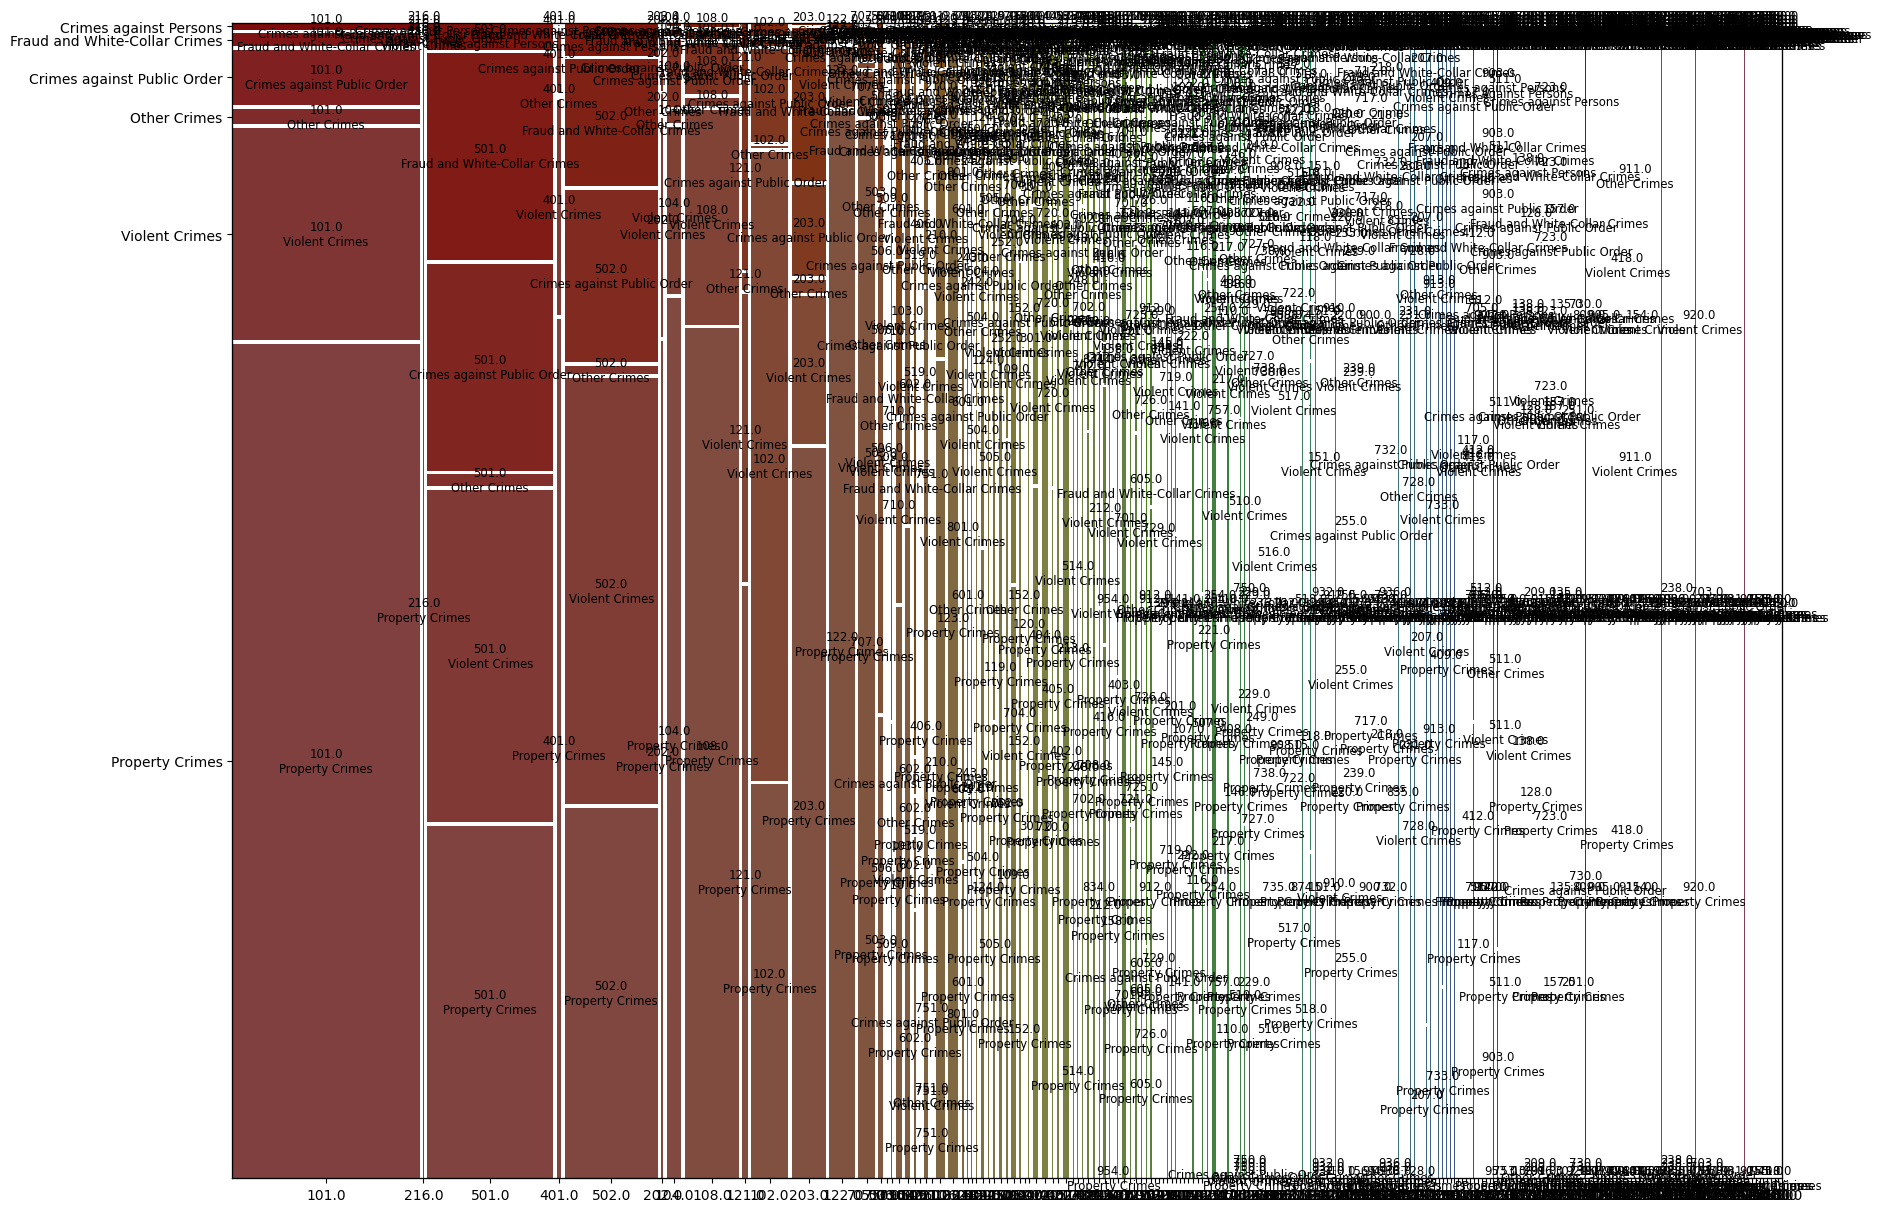

In [95]:
fig, ax = plt.subplots(figsize=(20, 15))
mplot.mosaic(train_df,["Premise_Code","Crime_Category"],ax=ax)
plt.show()

Property Crime are done in Premise_Code 101.0 (Street).

Violent crime are done in 501.0 (SINGLE FAMILY DWELLING).

In [97]:
cross_table(train_df,"Victim_Age","Crime_Category")

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Victim_Age                                                            
-2.0                                 0                            0   
-1.0                                 0                            0   
 0.0                                10                          194   
 2.0                                 7                            0   
 3.0                                 7                            0   
 4.0                                 4                            1   
 5.0                                 9                            2   
 6.0                                10                            3   
 7.0                                 8                            2   
 8.0                                11                            4   
 9.0                                13                            0   
 10.0                               11                            1   
 11.0                               14                            4   
 12.0                               20                            1   
 13.0                               21                            1   
 14.0                               11                           11   
 15.0                               13                            7   
 16.0                               17                            5   
 17.0                                5                            6   
 18.0                                0                           12   
 19.0                                1                           39   
 20.0                                1                           17   
 21.0                                0                           28   
 22.0                                0                           23   
 23.0                                1                           35   
 24.0                                0                           41   
 25.0                                0                           33   
 26.0                                1                           39   
 27.0                                2                           28   
 28.0                                3                           34   
 29.0                                3                           45   
 30.0                                0                           43   
 31.0                                1                           43   
 32.0                                1                           42   
 33.0                                1                           40   
 34.0                                2                           39   
 35.0                                0                           48   
 36.0                                1                           39   
 37.0                                0                           37   
 38.0                                1                           42   
 39.0                                1                           37   
 40.0                                0                           36   
 41.0                                0                           39   
 42.0                                1                           26   
 43.0                                1                           40   
 44.0                                0                           38   
 45.0                                0                           23   
 46.0                                0                           25   
 47.0                                1                           32   
 48.0                                1                           32   
 49.0                                0                           29   
 50.0                                2                           34   
 51.0                                0                           21   
 52.0                                1                           26   
 53.0                   

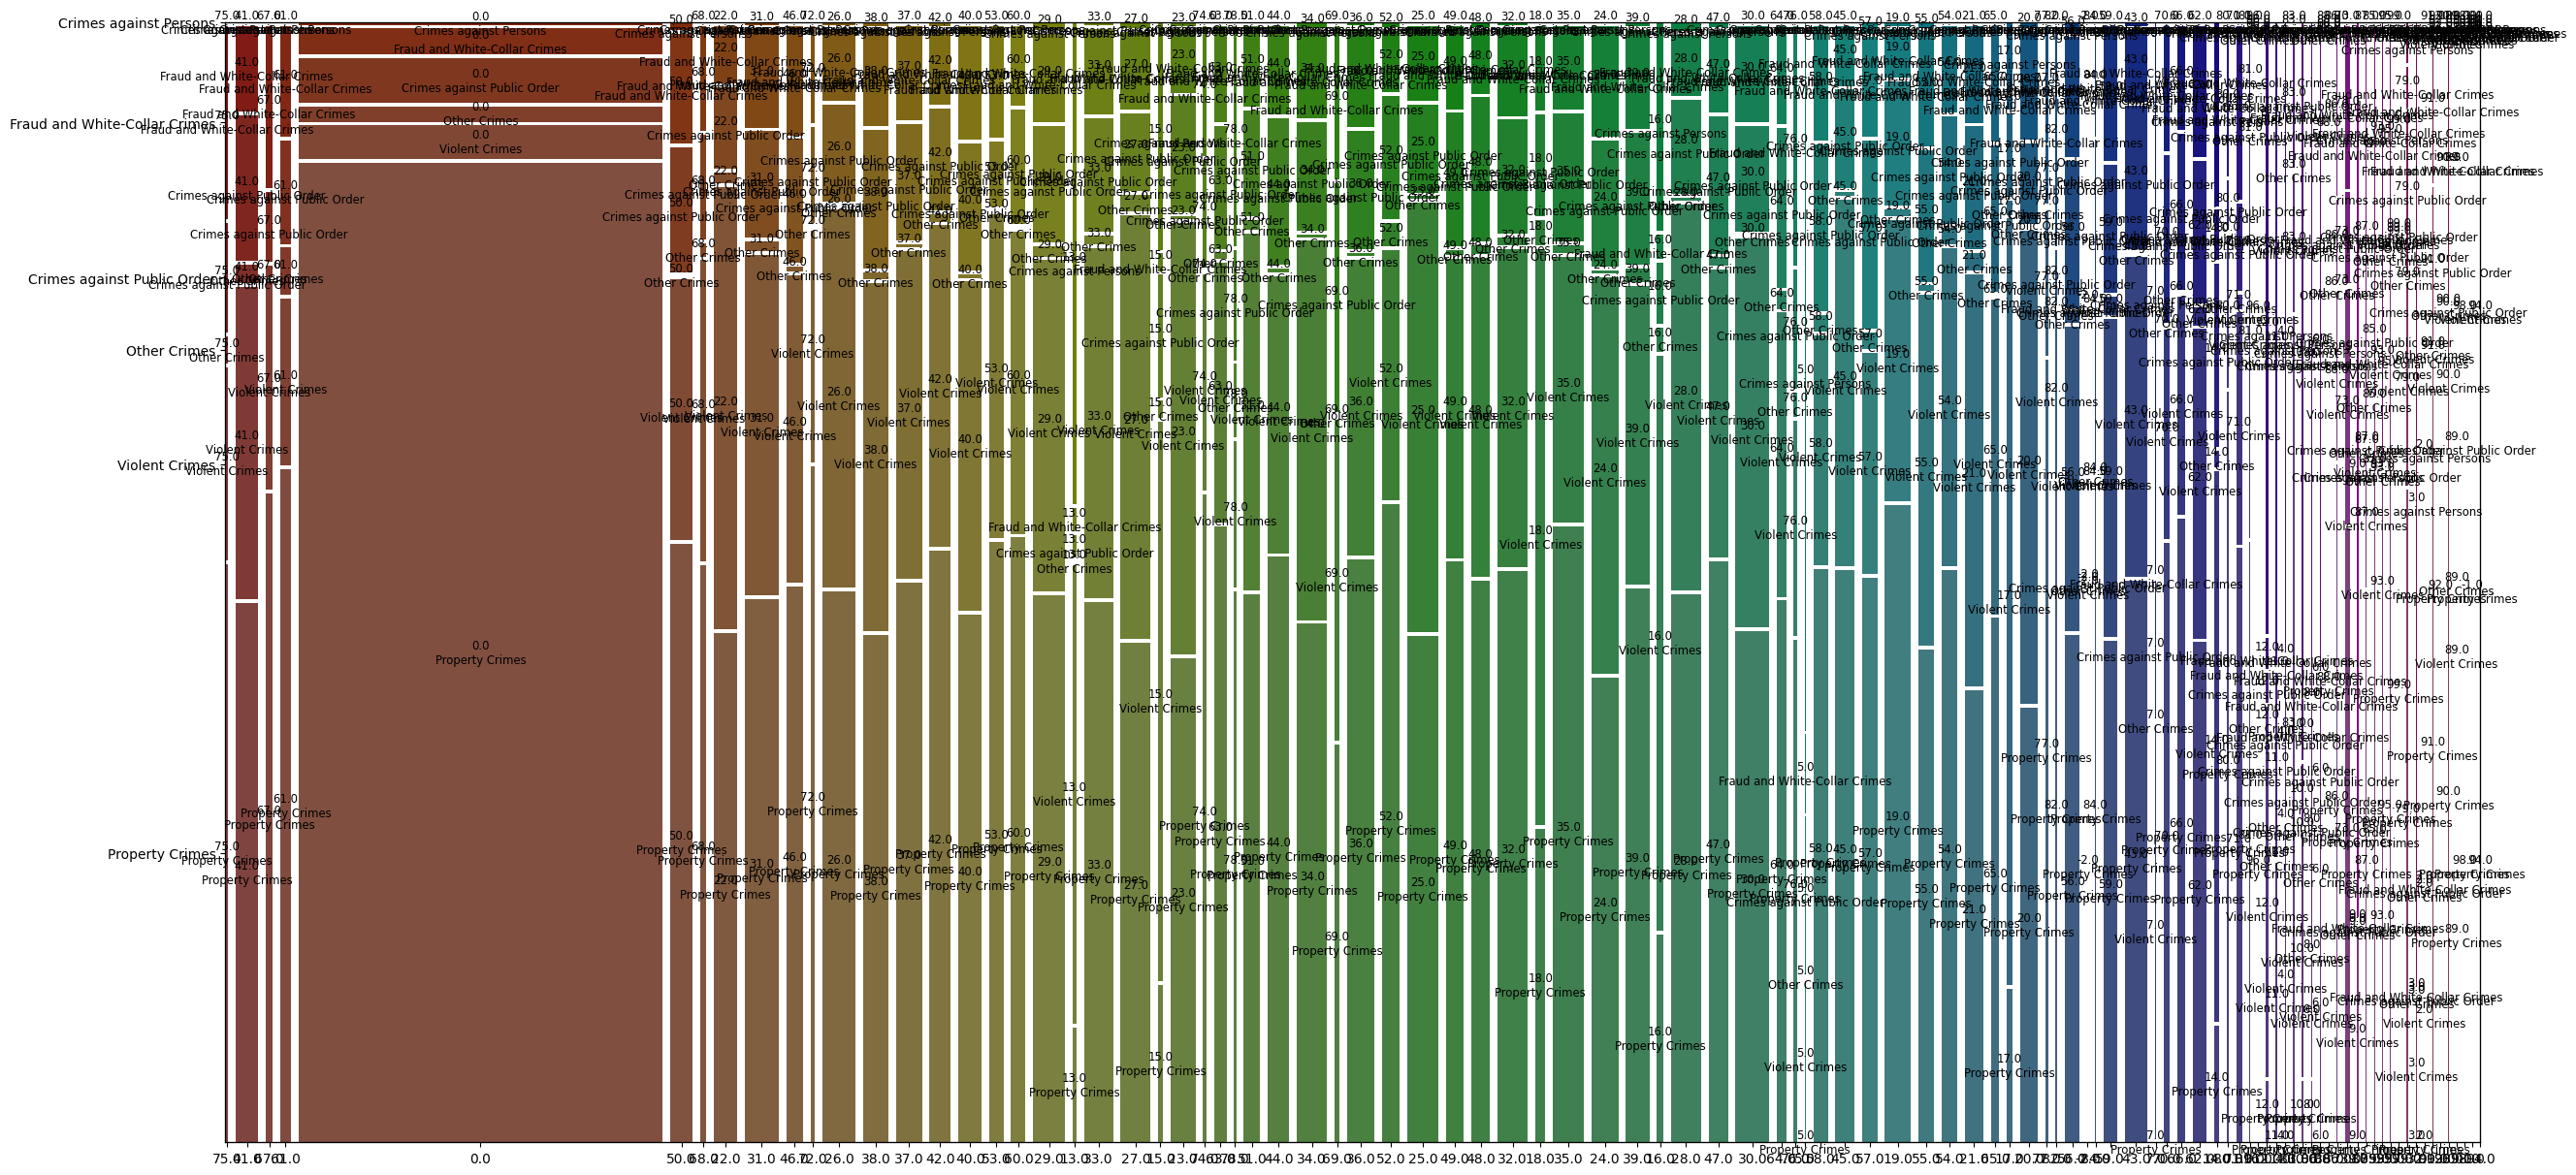

In [99]:
fig, ax = plt.subplots(figsize=(30, 15))
mplot.mosaic(train_df,["Victim_Age","Crime_Category"],ax=ax)
plt.show()

People of age 25 are the highest victim of Violent Crime.

In [100]:
cross_table(train_df,"Weapon_Used_Code","Victim_Sex")

Victim_Sex           F     M    X   All
Weapon_Used_Code                       
101.0                8    22    4    34
102.0               90   268   30   388
103.0                3     9    0    12
104.0                1     6    0     7
105.0                0     1    1     2
106.0               38    75   18   131
107.0                4    13    1    18
109.0               32   105   17   154
111.0                0     1    0     1
112.0                4     4    0     8
113.0                4    26    5    35
114.0               12    29    0    41
115.0                0     1    0     1
122.0                0     1    0     1
200.0               48   109    3   160
201.0               16    26    1    43
202.0                1     0    0     1
204.0                7    29    1    37
205.0               17    27    1    45
206.0                2     1    0     3
207.0               31    91    3   125
210.0                0     1    0     1
211.0                3     3    0     6
212.0               15    35    5    55
213.0                0     1    0     1
214.0                0     2    0     2
215.0                6    18    1    25
216.0                5     7    1    13
218.0                2    13    2    17
219.0                7    11    5    23
221.0                6     7    1    14
223.0                2    22    0    24
301.0               15    11    0    26
302.0               11    25    1    37
303.0                1     3    0     4
304.0               12    39    0    51
305.0                6     9    1    16
306.0               21    33    9    63
307.0               26    58    0    84
308.0               14    31    3    48
309.0                0    10    1    11
310.0                6    18    2    26
311.0               10     9    4    23
312.0               13    36    3    52
400.0             2279  1591  120  3990
500.0              285   394  110   789
501.0                0     0    1     1
503.0                0     0    1     1
504.0                2     0    0     2
506.0                3    10    9    22
508.0                0     2    0     2
510.0                0     3    0     3
511.0              270   260   16   546
512.0               25    54    1    80
513.0                3     1    0     4
514.0                1     4    2     7
515.0                7     8    3    18
All               3374  3573  387  7334

Highest no of crimes against female & male are done using Weapon_uesd_Code 400 ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE']

In [101]:
cross_table(train_df,"Weapon_Used_Code","Victim_Descent")

Victim_Descent      A     B  F     H  I  J   K    O     W    X   All
Weapon_Used_Code                                                    
101.0               2     8  0    17  0  0   0    2     1    4    34
102.0               4   114  0   177  0  0   0   26    35   32   388
103.0               0     1  0     6  0  0   0    0     5    0    12
104.0               1     1  0     3  0  0   0    1     1    0     7
105.0               0     0  0     0  0  0   0    0     1    1     2
106.0               2    38  0    56  0  0   0    4    10   21   131
107.0               0     5  0    10  0  0   0    1     1    1    18
109.0               2    48  0    68  0  0   0    4     9   23   154
111.0               0     0  0     0  0  0   0    1     0    0     1
112.0               0     1  0     5  0  0   0    1     1    0     8
113.0               2     3  0    20  0  0   0    1     4    5    35
114.0               0    10  0    24  0  0   0    1     6    0    41
115.0               0     0  0     1  0  0   0    0     0    0     1
122.0               0     0  0     1  0  0   0    0     0    0     1
200.0               1    42  0    80  0  0   0    7    24    6   160
201.0               0    13  0    23  0  0   0    3     2    2    43
202.0               0     0  0     1  0  0   0    0     0    0     1
204.0               2     5  0    22  0  0   0    1     6    1    37
205.0               3     8  0    25  0  0   0    3     4    2    45
206.0               0     1  0     2  0  0   0    0     0    0     3
207.0               2    37  0    53  0  0   1    8    20    4   125
210.0               0     0  0     1  0  0   0    0     0    0     1
211.0               0     1  0     4  0  0   0    0     1    0     6
212.0               1     6  0    31  0  0   0    5     7    5    55
213.0               0     0  0     1  0  0   0    0     0    0     1
214.0               0     2  0     0  0  0   0    0     0    0     2
215.0               0     8  0    12  0  0   0    3     1    1    25
216.0               0     5  0     5  0  0   0    0     2    1    13
218.0               0     2  0    12  0  0   0    0     1    2    17
219.0               0     4  0    11  0  0   0    0     3    5    23
221.0               0     3  0     4  0  0   0    3     3    1    14
223.0               1     4  0    11  0  0   0    2     6    0    24
301.0               0     3  0    19  0  0   0    1     3    0    26
302.0               0     5  0    24  0  0   1    2     4    1    37
303.0               0     0  0     3  0  0   0    0     1    0     4
304.0               0    12  0    23  0  0   0    1    15    0    51
305.0               0     2  0    11  0  0   0    0     2    1    16
306.0               1     3  0    23  0  0   0    6    21    9    63
307.0               1    24  0    31  0  0   0    6    19    3    84
308.0               1    14  0    22  0  0   0    2     6    3    48
309.0               0     0  0     5  0  0   0    1     4    1    11
310.0               0     4  0    12  0  0   0    4     2    4    26
311.0               0     7  0     8  0  0   0    0     3    5    23
312.0               0    16  0    25  0  0   0    0     8    3    52
400.0              87   810  2  1936  1  1  12  283   724  134  3990
500.0              18   151  0   258  0  0   1   59   179  123   789
501.0               0     0  0     0  0  0   0    0     0    1     1
503.0               0     0  0     0  0  0   0    0     0    1     1
504.0               0     0  0     0  0  0   0    0     0    2     2
506.0               0     4  0     5  0  0   0    3     1    9    22
508.0               0     1  0     1  0  0   0    0     0    0     2
510.0               0     0  0     1  0  0   0    2     0    0     3
511.0               2   127  0   244  1  0   1   41   109   21   546
512.0               2    25  0    33  0  0   0    5    11    4    80
513.0               0     1  0     1  0  0   0    1     1    0     4
514.0               0     2  0     2  0  0   0    0     1    2     

Highest no of crimes against Victim_Descent "H" are done using Weapon_uesd_Code 400 ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE']

In [102]:
pd.pivot_table(train_df, index=["Area_ID", "Month_Reported"], columns="Crime_Category",
                              aggfunc="size", fill_value=0)

Crime_Category          Crimes against Persons  Crimes against Public Order  \
Area_ID Month_Reported                                                        
1.0     1                                    0                            9   
        2                                    1                           12   
        3                                    1                            9   
        4                                    0                            6   
        5                                    1                            8   
        6                                    0                            6   
        7                                    0                            5   
        8                                    1                            7   
        9                                    0                            9   
        10                                   0                            6   
        11                                   0                            5   
        12                                   0                            7   
2.0     1                                    0                            4   
        2                                    1                           12   
        3                                    1                            8   
        4                                    0                            7   
        5                                    0                            6   
        6                                    1                            7   
        7                                    0                            8   
        8                                    2                            8   
        9                                    0                            8   
        10                                   1                            3   
        11                                   1                            3   
        12                                   0                            6   
3.0     1                                    2                           11   
        2                                    4                           13   
        3                                    1                           11   
        4                                    0                            7   
        5                                    3                           11   
        6                                    2                            4   
        7                                    1                            4   
        8                                    4                            6   
        9                                    4                           10   
        10                                   3                           10   
        11                                   0                            9   
        12                                   3                           11   
4.0     1                                    1                            9   
        2                                    1                            4   
        3                                    0                            4   
        4                                    1                            5   
        5                                    0                            4   
        6                                    2                            5   
        7                                    0                            5   
        8                                    1                            4   
        9                                    1                            8   
        10                                   1                            4   
        11                                   1                            7   
        12                                   1                            5   
5.0     1                                    2    

Highest no of Property Crimes happen in Area_ID 14 on Month_Reported 8 .

In [103]:
pd.pivot_table(train_df, index=["Status","Victim_Sex"], columns="Crime_Category", aggfunc="size", fill_value=0)

Crime_Category     Crimes against Persons  Crimes against Public Order  \
Status Victim_Sex                                                        
AA     F                               33                          196   
       M                               35                          114   
       X                                1                           13   
AO     F                               46                          277   
       M                               34                          179   
       X                                0                            9   
IC     F                               52                          410   
       H                                0                            0   
       M                               22                          473   
       X                                0                          128   
JA     F                                1                            3   
       M                                0                            2   
       X                                0                            1   
JO     F                                1                            2   
       M                                0                            0   
       X                                0                            1   

Crime_Category     Fraud and White-Collar Crimes  Other Crimes  \
Status Victim_Sex                                                
AA     F                                      12             4   
       M                                      14            17   
       X                                       8            12   
AO     F                                       6            13   
       M                                      10            11   
       X                                      19             4   
IC     F                                     604            32   
       H                                       1             0   
       M                                     604            56   
       X                                      42            29   
JA     F                                       0             0   
       M                                       0             0   
       X                                       0             1   
JO     F                                       1             0   
       M                                       0             0   
       X                                       0             0   

Crime_Category     Property Crimes  Violent Crimes  
Status Victim_Sex                                   
AA     F                       139             459  
       M                       337             366  
       X                       150              13  
AO     F                       175             847  
       M                       224             580  
       X                        74              10  
IC     F                      2695            1131  
       H                         1               0  
       M                      4134            1275  
       X                      1109              28  
JA     F                         7              12  
       M                        22              13  
       X                         3               2  
JO     F                         0              18  
       M                         4              12  
       X                         3               0

Highest no of Property Crimes & Violent Crimes are against Victim_Sex "M"[male] are in Status "IC"["Invest Cont"].

Most of Property Crimes & Violent Crimes are against Victim_Sex "F"[Female] are also in Status "IC"["Invest Cont"].

In [104]:
 pd.pivot_table(train_df, index=["Victim_Sex","Victim_Descent"], columns="Crime_Category", aggfunc="size", fill_value=0,)

Crime_Category             Crimes against Persons  \
Victim_Sex Victim_Descent                           
F          A                                    2   
           B                                   22   
           C                                    0   
           D                                    0   
           F                                    0   
           H                                   92   
           I                                    0   
           J                                    0   
           K                                    0   
           O                                    5   
           P                                    0   
           U                                    0   
           V                                    0   
           W                                   12   
           X                                    0   
           Z                                    0   
H          B                                    0   
           F                                    0   
M          A                                    1   
           B                                   29   
           C                                    0   
           F                                    0   
           G                                    0   
           H                                   48   
           I                                    0   
           J                                    0   
           K                                    0   
           O                                    6   
           P                                    0   
           U                                    0   
           V                                    0   
           W                                    7   
           X                                    0   
           Z                                    0   
X          H                                    0   
           X                                    1   

Crime_Category             Crimes against Public Order  \
Victim_Sex Victim_Descent                                
F          A                                         8   
           B                                       217   
           C                                         0   
           D                                         0   
           F                                         0   
           H                                       409   
           I                                         0   
           J                                         0   
           K                                         1   
           O                                        55   
           P                                         1   
           U                                         0   
           V                                         0   
           W                                       194   
           X                                         3   
           Z                                         0   
H          B                                         0   
           F                                         0   
M          A                                        14   
           B                                       154   
           C                                         2   
           F                                         0   
           G                                         0   
           H                                       315   
           I                                         0   
           J                                         0   
           K                                         2   
           O                                        77   
           P                                         0   
           U                                         0   
           V                                         0   
           W                                       189   
           X 

Violent Crimes on Female are highest against Victim_Descent "H" .

Property Crimes on male are highest against Victim_Descent "W" 

Most of the on female are against Victim_Descent "H" & "B" .


**Data Visualization**

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

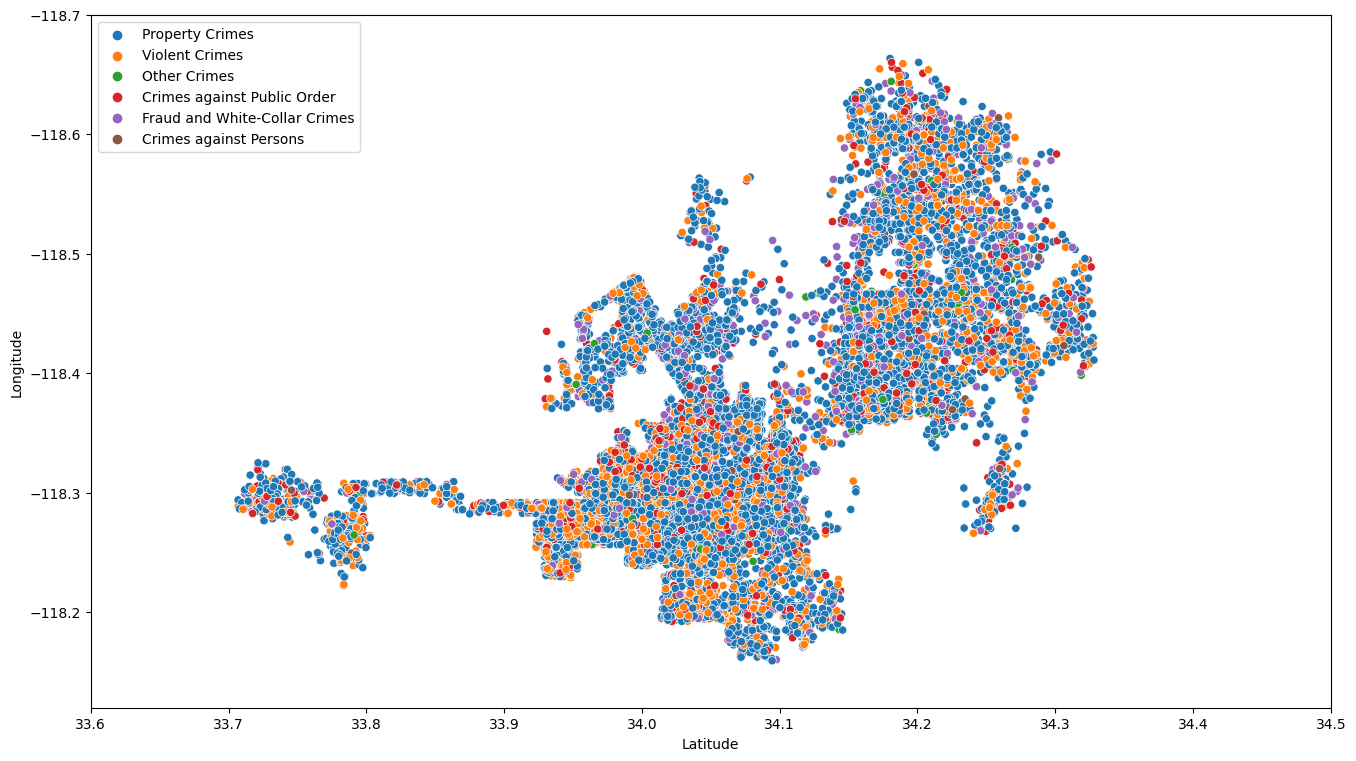

In [106]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="Latitude",y="Longitude", data=train_df, hue="Crime_Category")
plt.xlim(33.6,34.5)
plt.ylim(-118.12,-118.7)
plt.legend(loc=2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


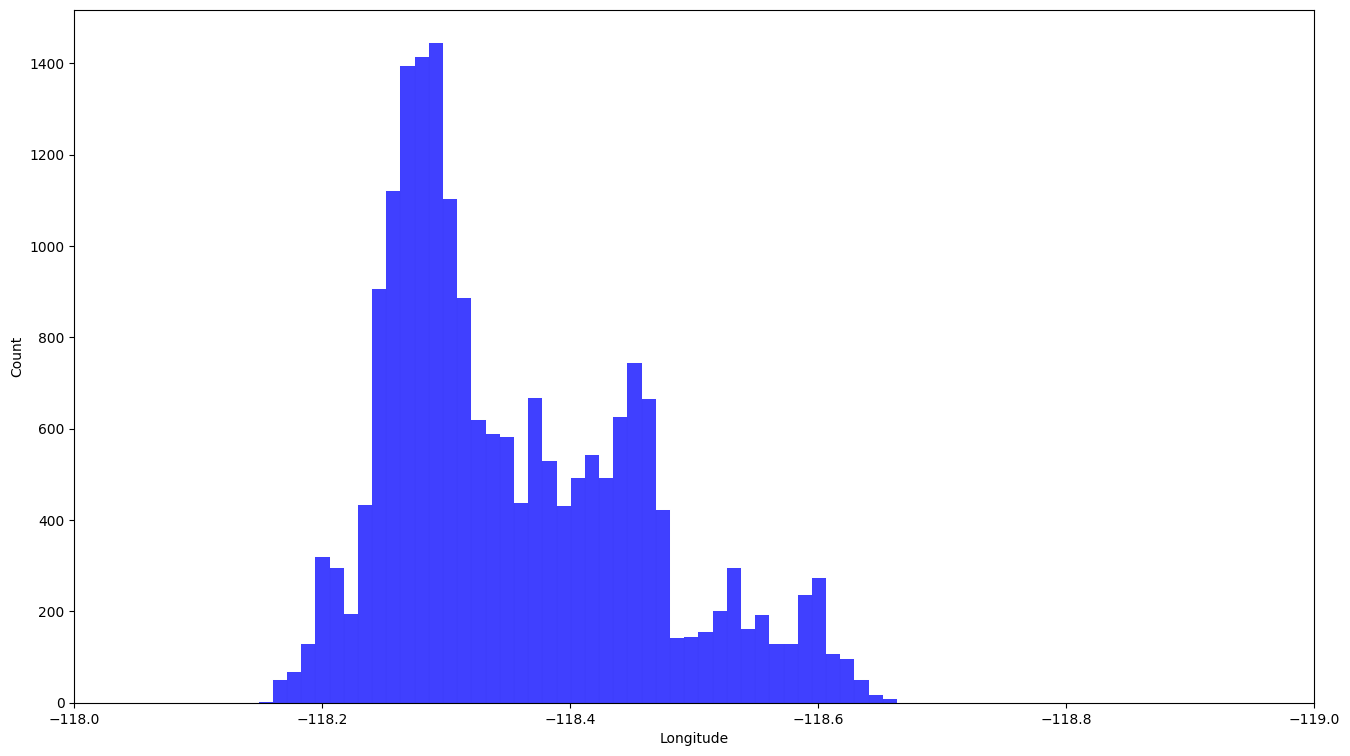

In [107]:
plt.figure(figsize=(16,9))
sns.histplot(train_df.Longitude,color="b")
plt.xlim(-118,-119)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(33.6, 34.7)

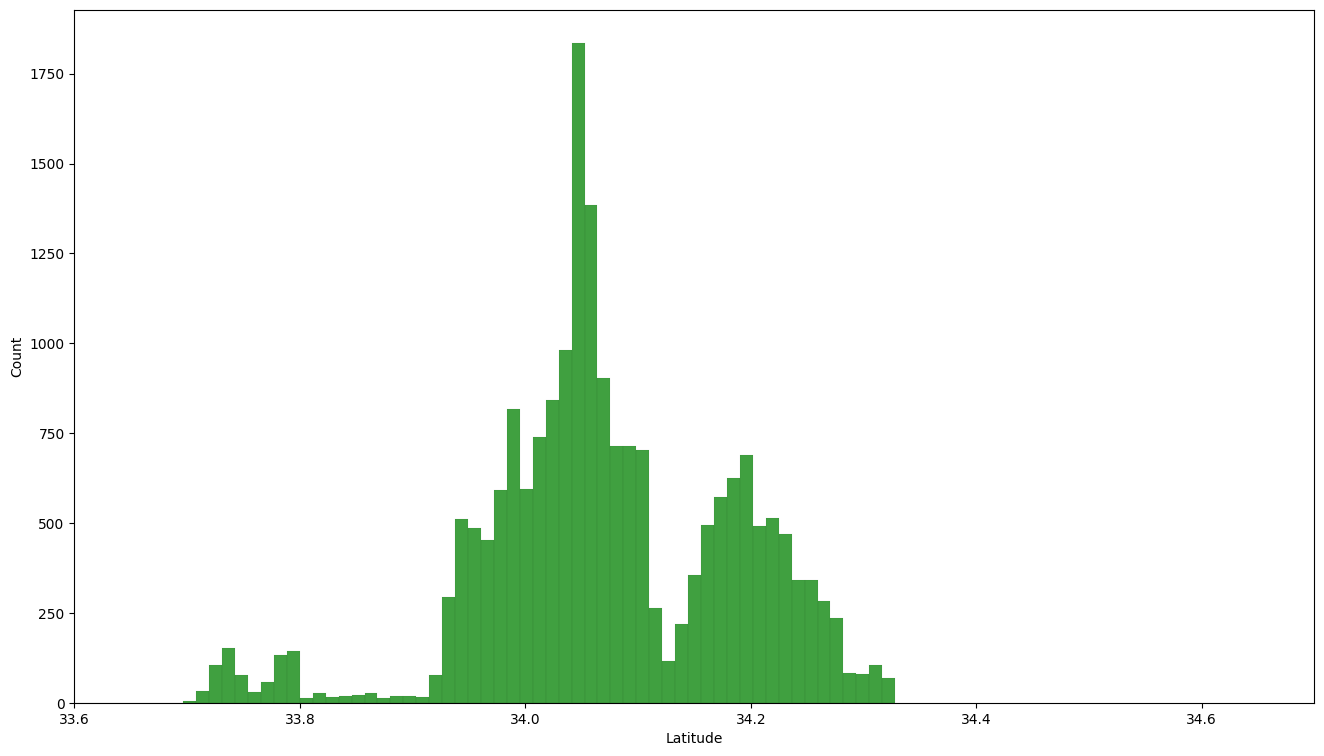

In [108]:
plt.figure(figsize=(16,9))
sns.histplot(train_df.Latitude,color="g")
plt.xlim(33.6,34.7)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weapon_Used_Code', ylabel='Count'>

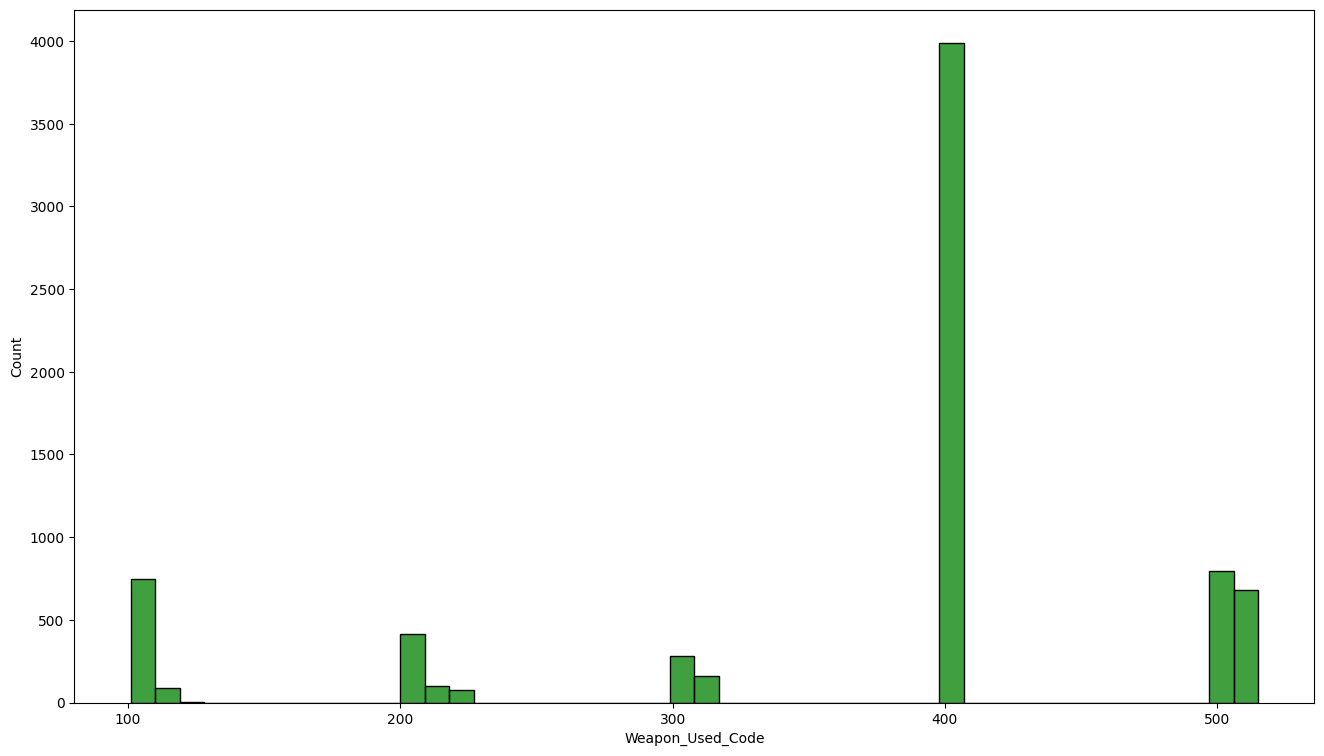

In [109]:
plt.figure(figsize=(16,9))
sns.histplot(train_df.Weapon_Used_Code,color="g")

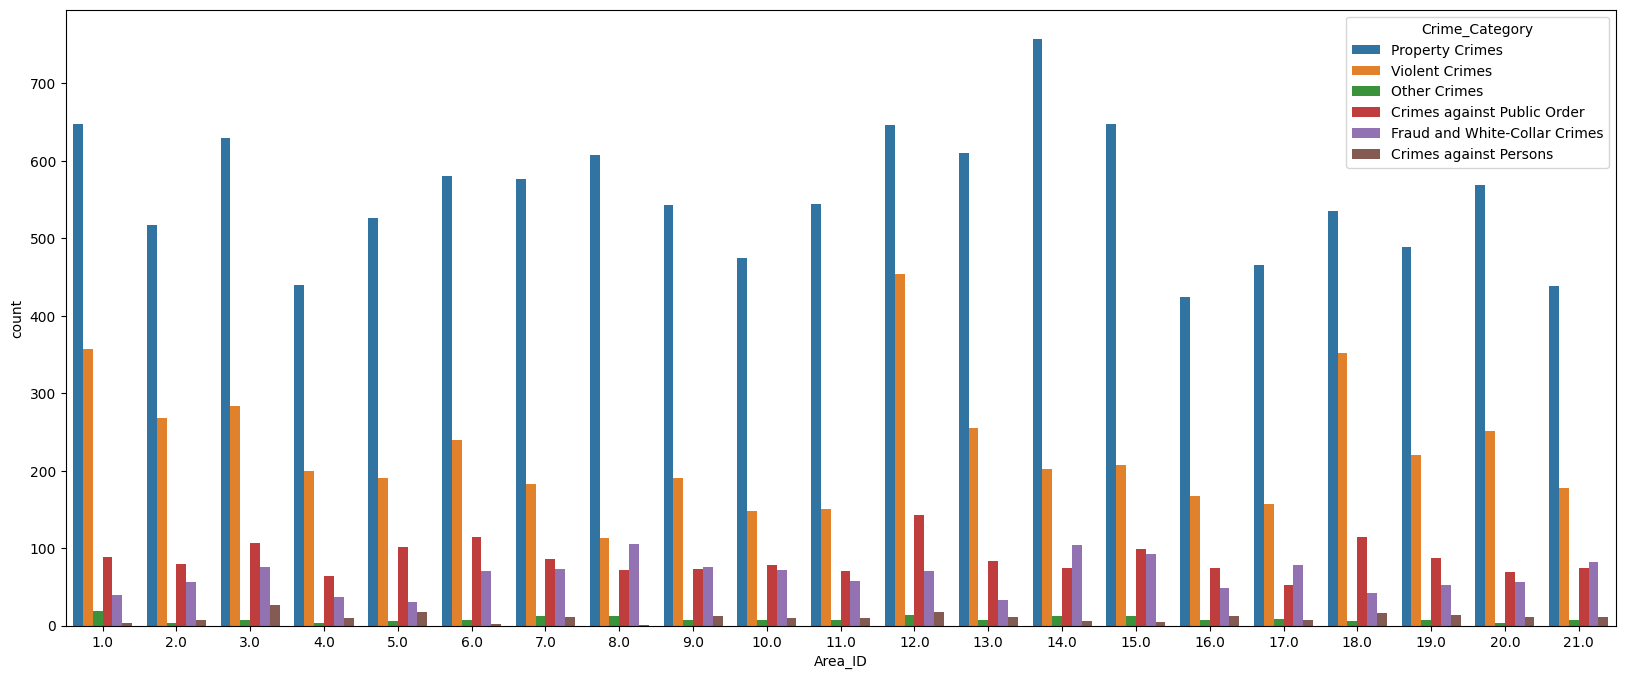

In [110]:
plt.figure(figsize=(20,8))
sns.countplot(x="Area_ID",hue="Crime_Category", data=train_df)

plt.show()

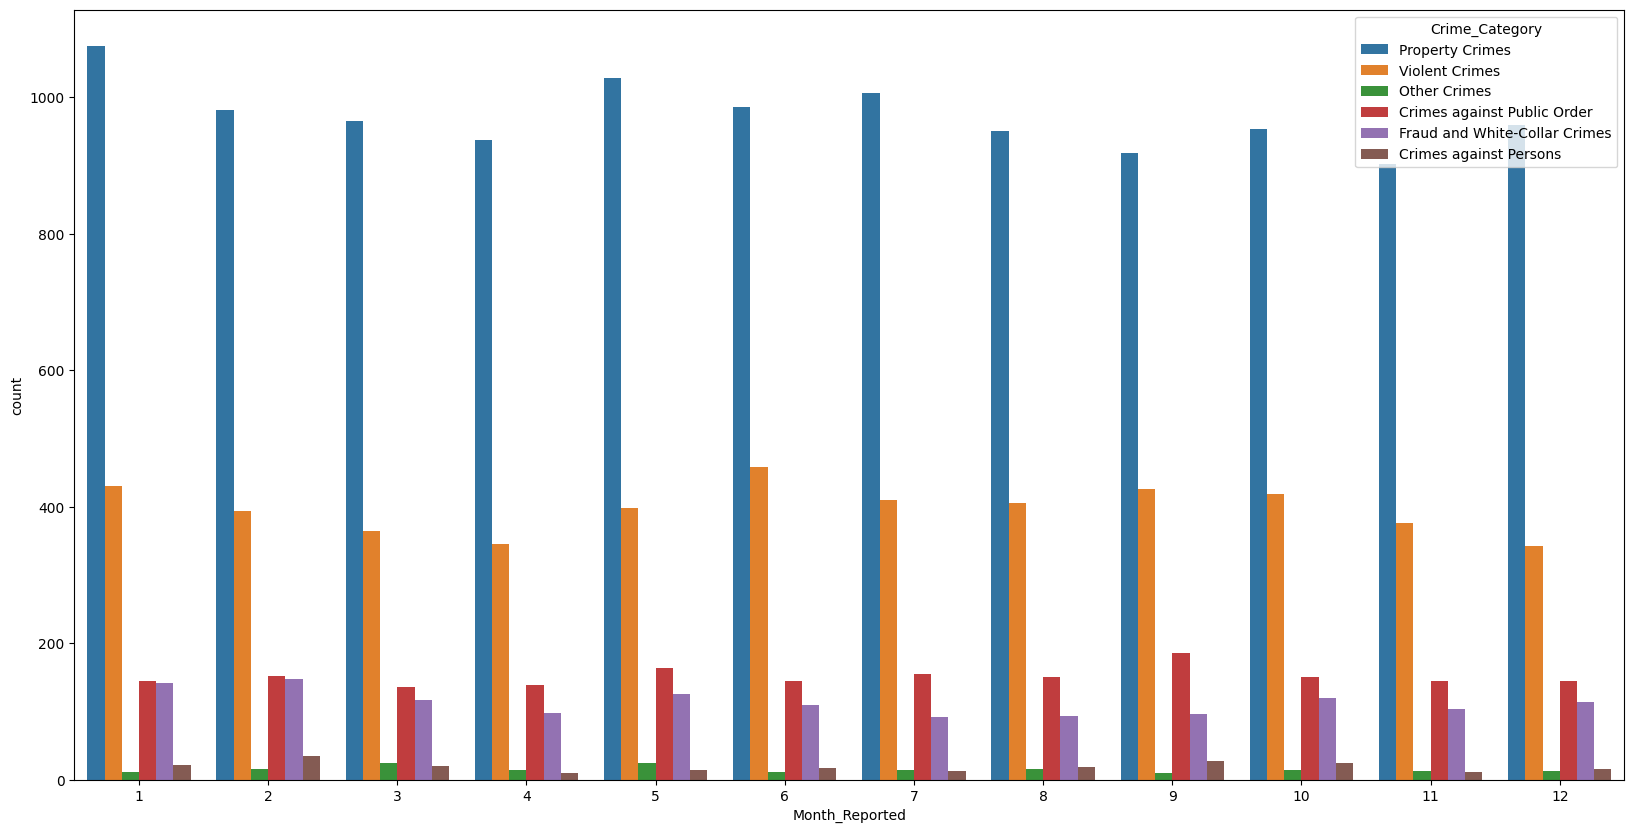

In [111]:
plt.figure(figsize=(20,10))
sns.countplot(x="Month_Reported",hue="Crime_Category", data=train_df)

plt.show()

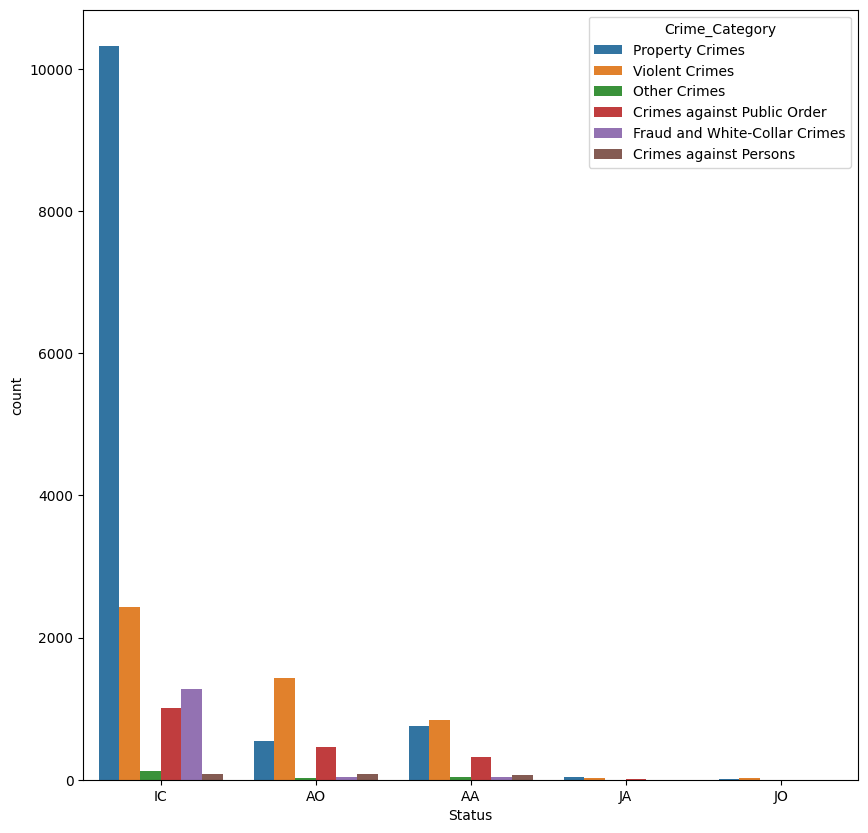

In [112]:
plt.figure(figsize=(10,10))
sns.countplot(x="Status",hue="Crime_Category", data=train_df)

plt.show()

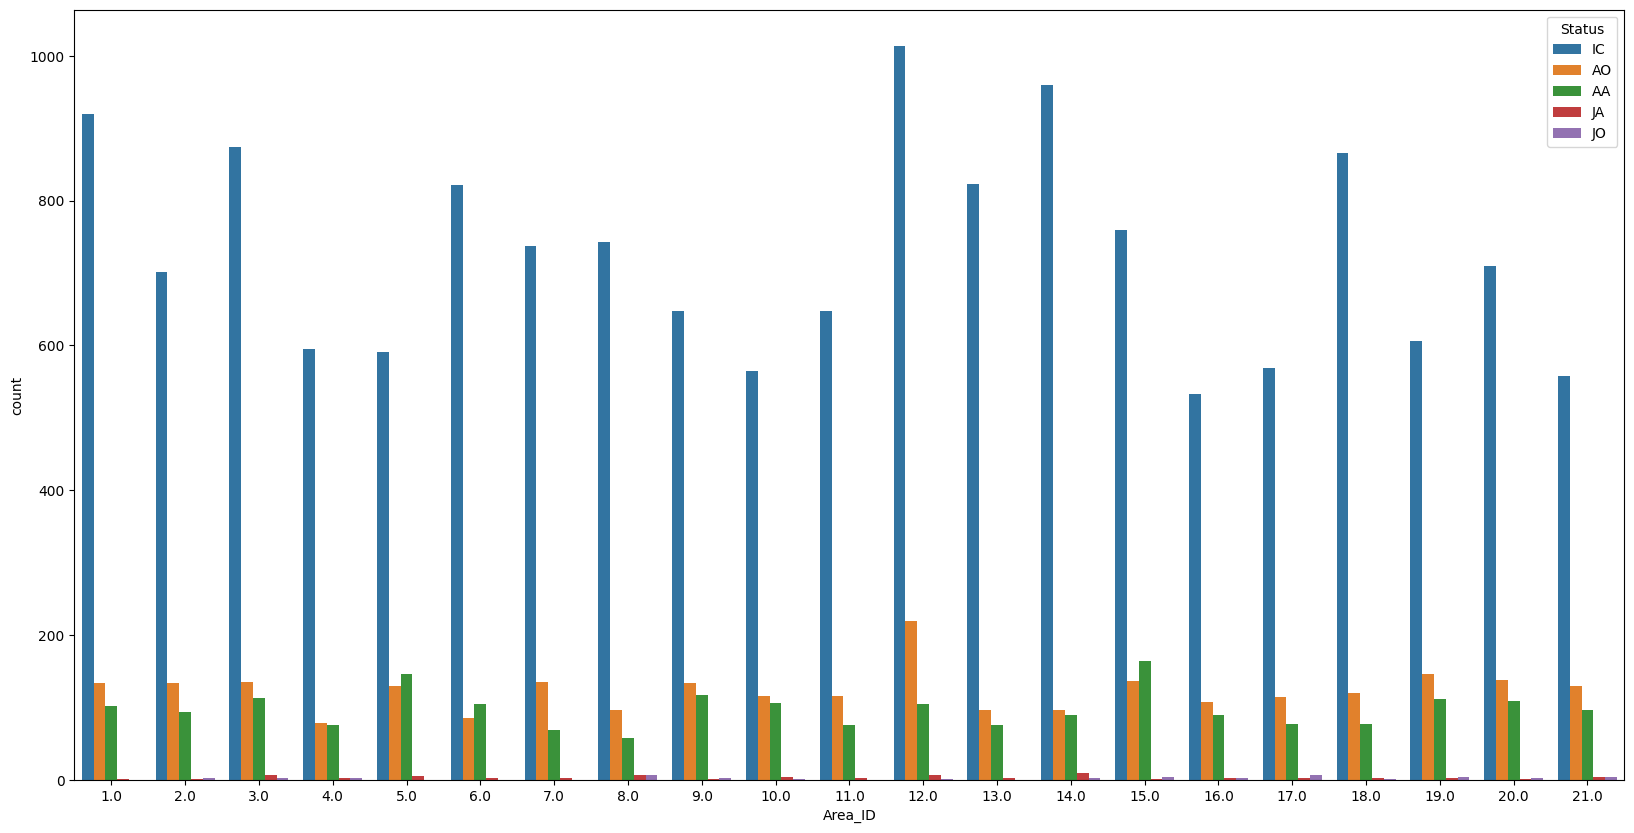

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(x="Area_ID",hue="Status", data=train_df)

plt.show()

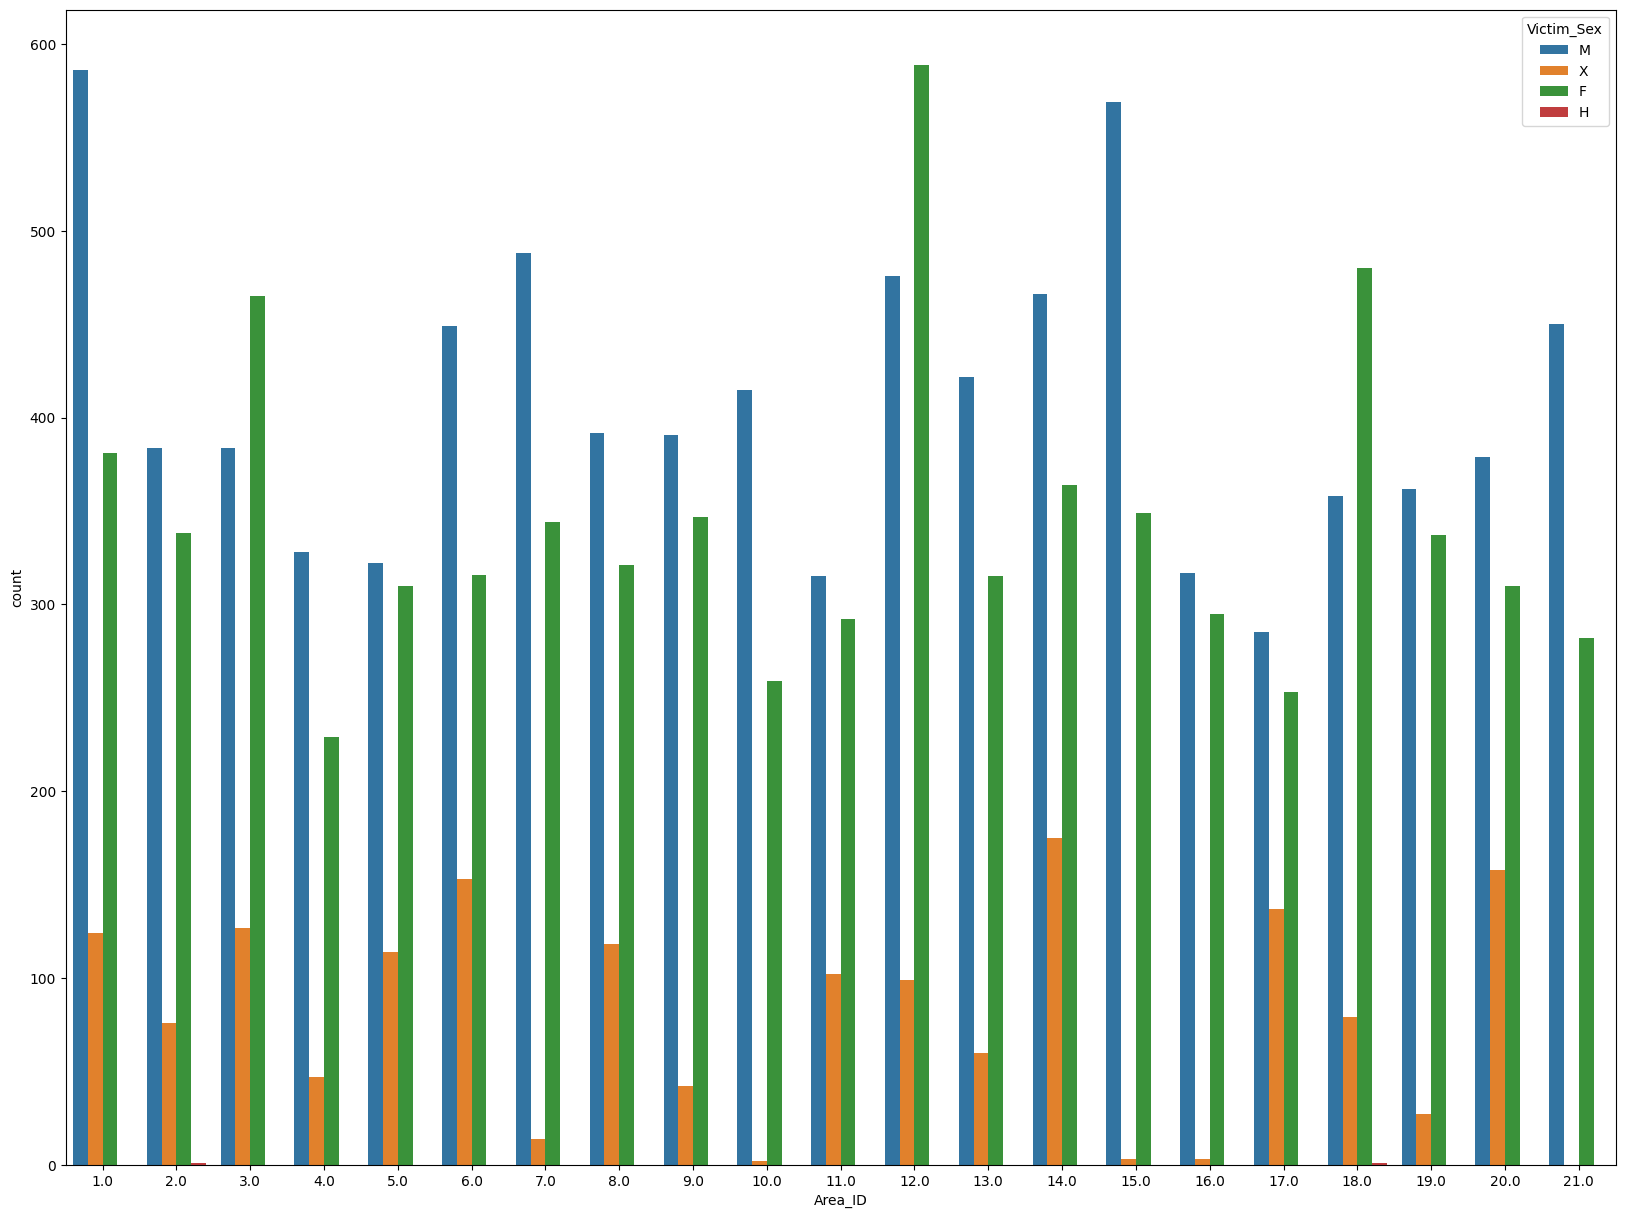

In [114]:
plt.figure(figsize=(20,15))
sns.countplot(x="Area_ID",hue="Victim_Sex", data=train_df)

plt.show()

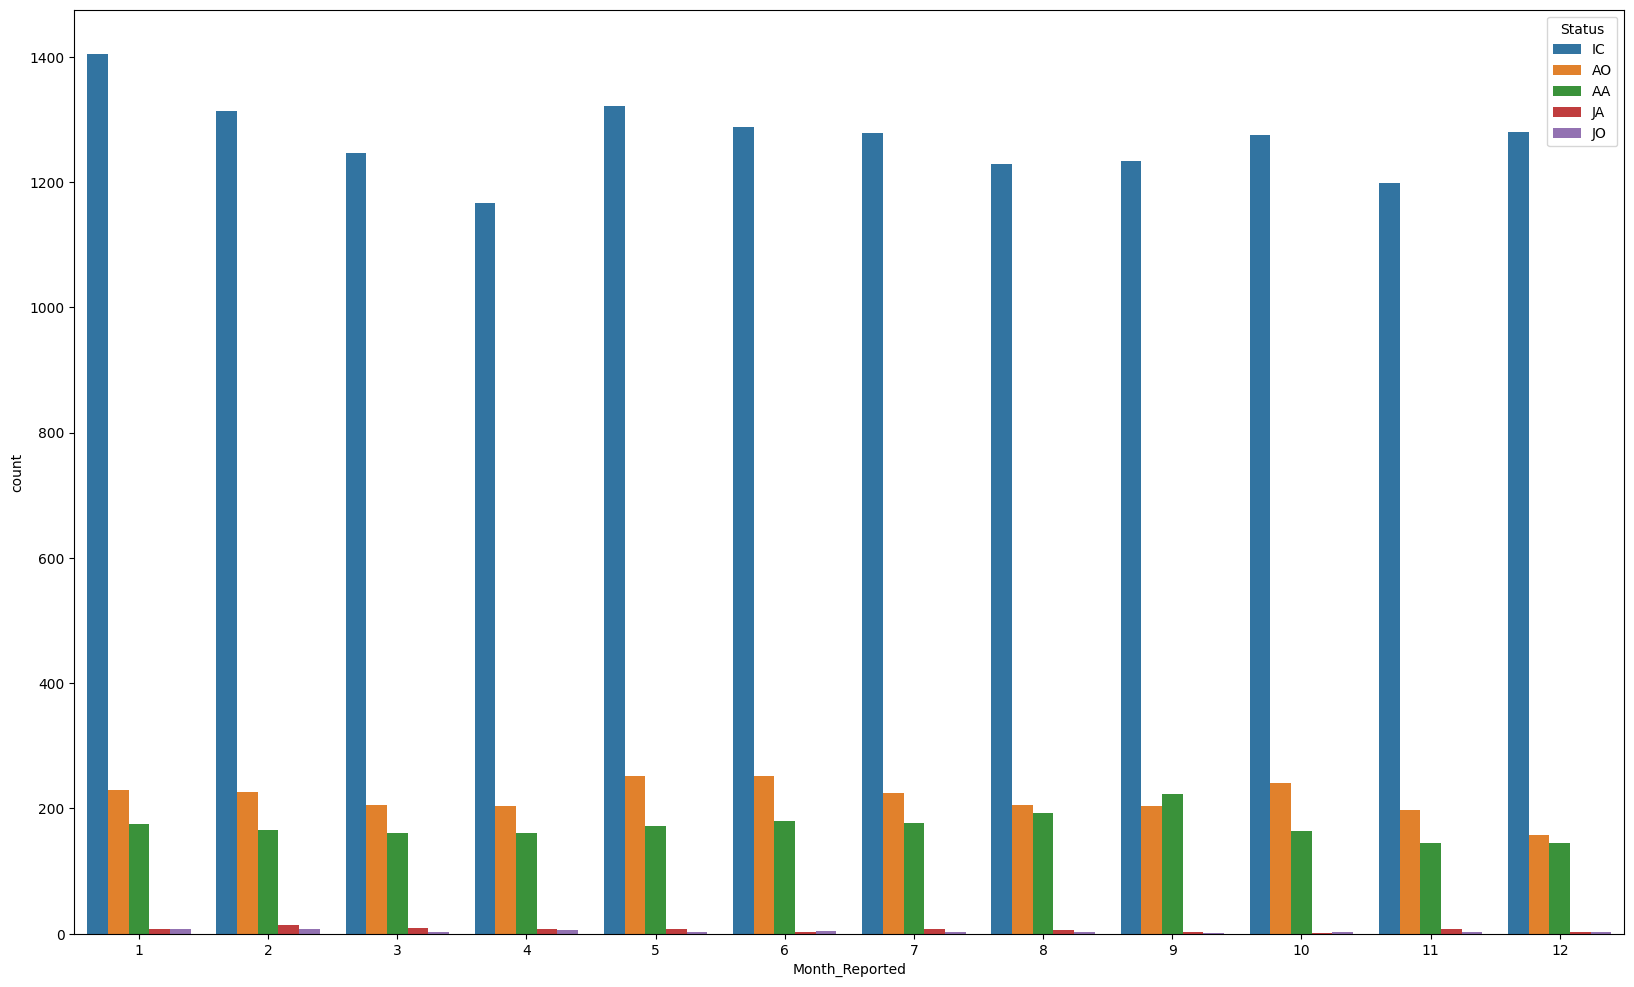

In [115]:
plt.figure(figsize=(20,12))
sns.countplot(x="Month_Reported",hue="Status", data=train_df)

plt.show()

In [117]:
def hist_plot(col, bins=50, figsize=(8, 6)) :
        plt.figure(figsize=figsize)
        train_df[col].hist(bins=bins)
        plt.title(f'Histogram of {col}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

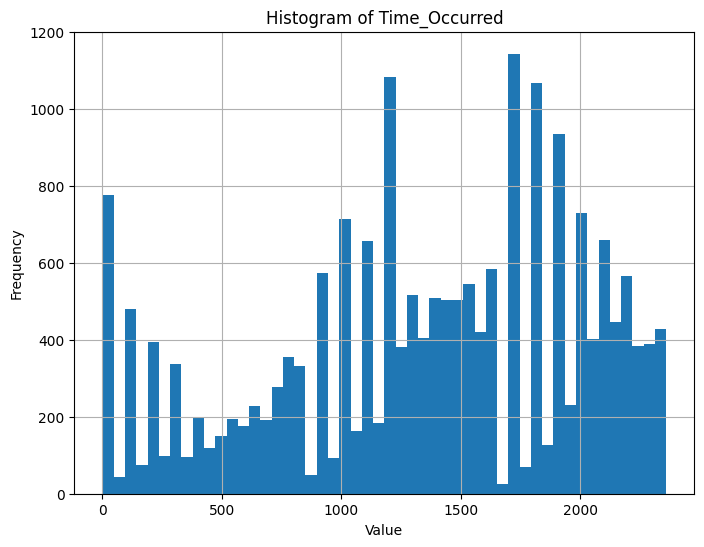

In [118]:
hist_plot('Time_Occurred')

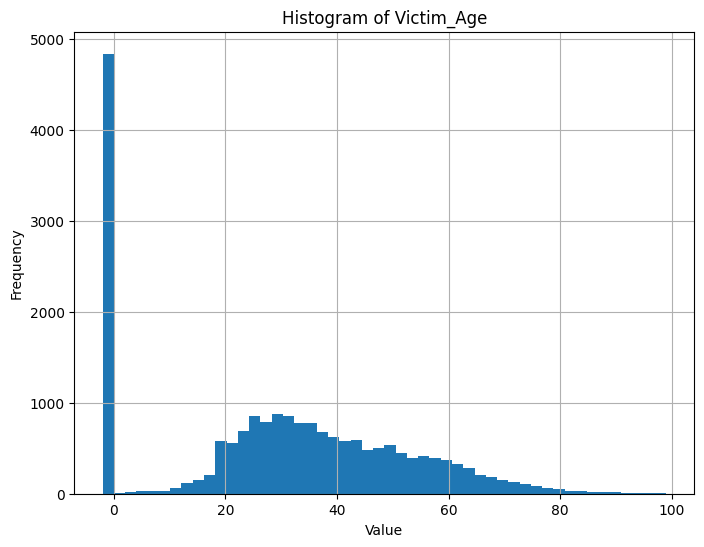

In [119]:
hist_plot('Victim_Age')

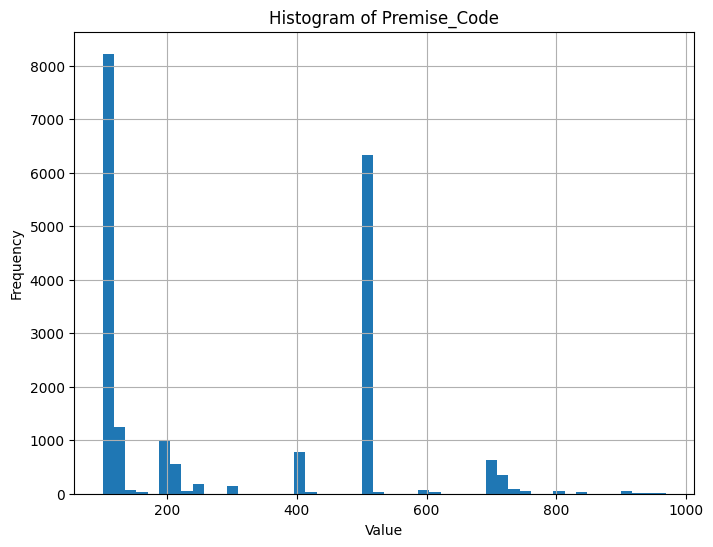

In [120]:
hist_plot('Premise_Code')

**Data Cleaning**

In [121]:
new_df=train_df.Modus_Operandi

In [122]:
new_df

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [123]:
new_df.str.len().max(),new_df.str.len().median(),new_df.str.len().min(),new_df.str.len().mean()

(49.0, 14.0, 4.0, 16.95729764181007)

In [125]:
n_df=pd.DataFrame()

In [126]:
n_df['M_d_1']=new_df.str.slice(0, 4)
n_df['M_d_2']=new_df.str.slice(4, 9)
n_df['M_d_3']=new_df.str.slice(9, 14)
n_df['M_d_4']=new_df.str.slice(14, 19)
n_df['M_d_5']=new_df.str.slice(19,24)
n_df['M_d_6']=new_df.str.slice(24, 29)
n_df['M_d_7']=new_df.str.slice(29,34)
n_df['M_d_8']=new_df.str.slice(34,39)
n_df['M_d_9']=new_df.str.slice(39,44)
n_df['M_d_10']=new_df.str.slice(44, 49)

In [127]:
n_df

M_d_1  M_d_2  M_d_3  M_d_4  M_d_5  M_d_6  M_d_7  M_d_8 M_d_9 M_d_10
0      0385                                                              
1      0906   0352   0371   0446   1822   0344   0416   0417             
2      0329   1202                                                       
3      0329   1300                                                       
4      0416   0945   1822   0400   0417   0344                           
...     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...
19995  0416   0446   2004   0913                                         
19996  1822   0209   0344   1414   1420                                  
19997  0344   1822   1420                                                
19998  1202   2038   0913   0602   1242   0553                           
19999   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN

[20000 rows x 10 columns]

In [130]:
n_df.fillna('unknown',inplace=True)
n_df.replace('','finish', inplace=True)

In [131]:
n_df

M_d_1    M_d_2    M_d_3    M_d_4    M_d_5    M_d_6    M_d_7    M_d_8  \
0         0385   finish   finish   finish   finish   finish   finish   finish   
1         0906     0352     0371     0446     1822     0344     0416     0417   
2         0329     1202   finish   finish   finish   finish   finish   finish   
3         0329     1300   finish   finish   finish   finish   finish   finish   
4         0416     0945     1822     0400     0417     0344   finish   finish   
...        ...      ...      ...      ...      ...      ...      ...      ...   
19995     0416     0446     2004     0913   finish   finish   finish   finish   
19996     1822     0209     0344     1414     1420   finish   finish   finish   
19997     0344     1822     1420   finish   finish   finish   finish   finish   
19998     1202     2038     0913     0602     1242     0553   finish   finish   
19999  unknown  unknown  unknown  unknown  unknown  unknown  unknown  unknown   

         M_d_9   M_d_10  
0       finish   finish  
1       finish   finish  
2       finish   finish  
3       finish   finish  
4       finish   finish  
...        ...      ...  
19995   finish   finish  
19996   finish   finish  
19997   finish   finish  
19998   finish   finish  
19999  unknown  unknown  

[20000 rows x 10 columns]

In [132]:
n_train_df=pd.concat([train_df,n_df],axis=1)

In [134]:
n_train_df.shape

(20000, 39)

In [140]:
n_train_df["Victim_Age"].loc[n_train_df["Victim_Age"] == -2] = 0
n_train_df["Victim_Age"].loc[n_train_df["Victim_Age"] == -1]= 0

/tmp/ipykernel_33/719935041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_train_df["Victim_Age"].loc[n_train_df["Victim_Age"] == -2] = 0
/tmp/ipykernel_33/719935041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_train_df["Victim_Age"].loc[n_train_df["Victim_Age"] == -1]= 0


In [141]:
Basic_info(n_train_df)

count  missing  no_unique           dtype  \
Location               20000        0      12399          object   
Cross_Street            3448    16552       1495          object   
Latitude               20000        0       3622         float64   
Longitude              20000        0       3578         float64   
Date_Reported          20000        0        811  datetime64[ns]   
Date_Occurred          20000        0        366  datetime64[ns]   
Time_Occurred          20000        0        996         float64   
Area_ID                20000        0         21         float64   
Area_Name              20000        0         21          object   
Reporting_District_no  20000        0       1120         float64   
Part 1-2               20000        0          2         float64   
Modus_Operandi         17259     2741      10489          object   
Victim_Age             20000        0         98         float64   
Victim_Sex             17376     2624          4          object   
Victim_Descent         17376     2624         17          object   
Premise_Code           20000        0        217         float64   
Premise_Description    19995        5        216          object   
Weapon_Used_Code        7335    12665         57         float64   
Weapon_Description      7335    12665         57          object   
Status                 20000        0          5          object   
Status_Description     20000        0          5          object   
Crime_Category         20000        0          6          object   
Year_Reported          20000        0          5           int32   
Month_Reported         20000        0         12           int32   
Day_Reported           20000        0         31           int32   
Hour_Occurred          20000        0        996         float64   
Year_Occurred          20000        0          1           int32   
Month_Occurred         20000        0         12           int32   
Day_Occurred           20000        0         31           int32   
M_d_1                  20000        0        302          object   
M_d_2                  20000        0        315          object   
M_d_3                  20000        0        311          object   
M_d_4                  20000        0        302          object   
M_d_5                  20000        0        297          object   
M_d_6                  20000        0        268          object   
M_d_7                  20000        0        232          object   
M_d_8                  20000        0        193          object   
M_d_9                  20000        0        155          object   
M_d_10                 20000        0        118          object   

                                                                 mode  v_mode  
Location                                                          6TH      33  
Cross_Street                                                 BROADWAY      56  
Latitude                                                      34.2012      90  
Longitude                                                   -118.2739     168  
Date_Reported                                     2020-07-13 00:00:00      87  
Date_Occurred                                     2020-01-01 00:00:00     137  
Time_Occurred                                                  1200.0     850  
Area_ID                                                          12.0    1345  
Area_Name                                                 77th Street    1345  
Reporting_District_no                                           645.0      99  
Part 1-2                                                          1.0   11637  
Modus_Operandi                                                   0344     826  
Victim_Age                                                        0.0    4834  
Victim_Sex                                                          M    8538  
Victim_Descent                                                      H    6143  
Premise_Code          

In [142]:
drop=["Location","Cross_Street","Date_Reported","Date_Occurred","Area_Name","Premise_Description","Weapon_Description","Status_Description","Hour_Occurred","Modus_Operandi",'M_d_5','M_d_6','M_d_7','M_d_8','M_d_9','M_d_10']

In [143]:
new_train_df=n_train_df.drop(drop,axis=1)

In [144]:
new_train_df["Victim_Descent"].fillna('unknown', inplace=True)
new_train_df["Victim_Sex"].fillna('unknown', inplace=True)
new_train_df["Weapon_Used_Code"].fillna(new_train_df["Weapon_Used_Code"].mean(), inplace=True)

/tmp/ipykernel_33/1850407737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_train_df["Victim_Descent"].fillna('unknown', inplace=True)
/tmp/ipykernel_33/1850407737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [145]:
Basic_info(new_train_df)

count  missing  no_unique    dtype             mode  \
Latitude               20000        0       3622  float64          34.2012   
Longitude              20000        0       3578  float64        -118.2739   
Time_Occurred          20000        0        996  float64           1200.0   
Area_ID                20000        0         21  float64             12.0   
Reporting_District_no  20000        0       1120  float64            645.0   
Part 1-2               20000        0          2  float64              1.0   
Victim_Age             20000        0         98  float64              0.0   
Victim_Sex             20000        0          5   object                M   
Victim_Descent         20000        0         18   object                H   
Premise_Code           20000        0        217  float64            101.0   
Weapon_Used_Code       20000        0         58  float64       366.405044   
Status                 20000        0          5   object               IC   
Crime_Category         20000        0          6   object  Property Crimes   
Year_Reported          20000        0          5    int32             2020   
Month_Reported         20000        0         12    int32                1   
Day_Reported           20000        0         31    int32               28   
Year_Occurred          20000        0          1    int32             2020   
Month_Occurred         20000        0         12    int32                1   
Day_Occurred           20000        0         31    int32                1   
M_d_1                  20000        0        302   object             0344   
M_d_2                  20000        0        315   object          unknown   
M_d_3                  20000        0        311   object           finish   
M_d_4                  20000        0        302   object           finish   

                       v_mode  
Latitude                   90  
Longitude                 168  
Time_Occurred             850  
Area_ID                  1345  
Reporting_District_no      99  
Part 1-2                11637  
Victim_Age               4834  
Victim_Sex               8538  
Victim_Descent           6143  
Premise_Code             5033  
Weapon_Used_Code        12665  
Status                  15236  
Crime_Category          11666  
Year_Reported           19177  
Month_Reported           1824  
Day_Reported              721  
Year_Occurred           20000  
Month_Occurred           1835  
Day_Occurred              936  
M_d_1                    2844  
M_d_2                    2741  
M_d_3                    6447  
M_d_4                    9710

In [146]:
new_train_df.shape

(20000, 23)

**Data Pre-Processing**

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [148]:
X=new_train_df.drop('Crime_Category', axis=1)

In [149]:
y=pd.DataFrame(new_train_df['Crime_Category'])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((16000, 22), (16000, 1), (4000, 22), (4000, 1))

In [152]:
numeric_features = ["Victim_Age","Latitude","Longitude","Time_Occurred","Area_ID",
                    "Reporting_District_no","Part 1-2","Premise_Code",
                    "Weapon_Used_Code","Month_Reported","Day_Reported","Year_Reported",
                    "Year_Occurred","Month_Occurred","Day_Occurred"
                   ]
categorical_features = [
                         'Victim_Sex','Victim_Descent','Status',
                         'M_d_1','M_d_2','M_d_3','M_d_4'
                        ]

In [153]:
numeric_transformer = StandardScaler()
categorical_transformer =OrdinalEncoder()

In [154]:
preprocessor = ColumnTransformer(
                                  transformers=[
                                                 ('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_features),
                                               ]
                                )

In [155]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  ])

In [156]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Victim_Age', 'Latitude',
                                                   'Longitude', 'Time_Occurred',
                                                   'Area_ID',
                                                   'Reporting_District_no',
                                                   'Part 1-2', 'Premise_Code',
                                                   'Weapon_Used_Code',
                                                   'Month_Reported',
                                                   'Day_Reported',
                                                   'Year_Reported',
                                                   'Year_Occurred',
                                                   'Month_Occurred',
                                                   'Day_Occurred']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Victim_Sex',
                                                   'Victim_Descent', 'Status',
                                                   'M_d_1', 'M_d_2', 'M_d_3',
                                                   'M_d_4'])]))])

In [157]:
X_train_transformed = pipeline.fit_transform(X_train)
y_train_transformed=categorical_transformer.fit_transform(y_train)

In [158]:
y_train_transformed.shape,X_train_transformed.shape

((16000, 1), (16000, 22))

**Model Fitting**
* 1. MLP Classifier

 2. Bagging Classifier
 
 3. Random Forest Classifier*
 

**MLP Classifier**

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
mlp = MLPClassifier(warm_start=True,random_state=0,n_iter_no_change=5,)

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes':[(22,6)],
    'activation': ['relu', 'tanh', 'logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.00001,0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling','adaptive']
}

In [ ]:
 grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=10, scoring='accuracy',n_jobs=-1)

In [ ]:
 grid_search_mlp.fit(X_train_transformed,y_train_transformed)

In [ ]:
 print("Best parameters:", grid_search_mlp.best_params_)
 print("Best score:", grid_search_mlp.best_score_)

In [ ]:
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train_transformed,y_train_transformed)

In [ ]:
y_mlp_pred = best_mlp.predict(X_train_transformed)

In [ ]:
report_mlp = classification_report(y_train_transformed, y_mlp_pred)
conf_matrix_mlp = confusion_matrix(y_train_transformed, y_mlp_pred)

In [ ]:
print(report_mlp)

In [ ]:
print(conf_matrix_mlp)

**Bagging Classifier**

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
bagging = BaggingClassifier(random_state=0,warm_start=True,)

In [38]:
param_grid_bag = {
    'n_estimators': [10,50, 100, 200, 500],
    'bootstrap': [True, False],
}

In [41]:
 grid_search_bag = GridSearchCV(estimator=bagging, param_grid=param_grid_bag, cv=10, scoring='accuracy',n_jobs=-1)

In [42]:
 grid_search_bag.fit(X_train_transformed,y_train_transformed)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=10,
             estimator=BaggingClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='accuracy')

In [43]:
print("Best parameters:", grid_search_bag.best_params_)
print("Best score:", grid_search_bag.best_score_)

Best parameters: {'bootstrap': True, 'n_estimators': 500}
Best score: 0.9301250000000001


In [44]:
best_bag= grid_search_bag.best_estimator_
best_bag.fit(X_train_transformed,y_train_transformed)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


BaggingClassifier(n_estimators=500, random_state=0, warm_start=True)

In [45]:
y_bag_pred = best_bag.predict(X_train_transformed)

In [46]:
report_bag = classification_report(y_train_transformed, y_bag_pred)
conf_matrix_bag = confusion_matrix(y_train_transformed, y_bag_pred)

In [160]:
 print(report_bag)

In [48]:
 print(conf_matrix_bag)

[[ 184    0    0    0    0    0]
 [   0 1464    0    0    0    0]
 [   0    0 1081    0    0    0]
 [   0    0    0  141    0    0]
 [   0    0    0    0 9280    0]
 [   0    0    0    0    0 3850]]


**Random Forest Classifier**

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(random_state=0,warm_start=True,oob_score=True,bootstrap=True)

In [163]:
param_grid_rf = {
    'n_estimators': [ 10,50,100, 200,500],
    'criterion' : ['gini','entropy','log_loss'],
    'ccp_alpha' : [0.01,0.001],
    'class_weight' : ['balanced',None,'balanced_subsample'],
    'max_features' : ["sqrt", "log2", None],
}

In [164]:
 grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, n_jobs=-1)

In [166]:
 grid_search_rf.fit(X_train_transformed,y_train_transformed)

In [ ]:
 print("Best parameters:", grid_search_rf.best_params_)
 print("Best score:", grid_search_rf.best_score_)

In [ ]:
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_transformed,y_train_transformed)

In [ ]:
y_rf_pred = best_rf.predict(X_train_transformed)

In [ ]:
report_rf = classification_report(y_train_transformed, y_rf_pred)
conf_matrix_rf = confusion_matrix(y_train_transformed, y_rf_pred)

In [ ]:
print(report_rf)

In [ ]:
print(conf_matrix_rf)

**Preparing Test Data**

In [167]:
new_t_df= test_df.Modus_Operandi

In [168]:
new_t_df.str.len().max(),new_t_df.str.len().median(),new_t_df.str.len().min(),new_t_df.str.len().mean()

(49.0, 14.0, 4.0, 17.05722891566265)

In [170]:
n_t_df=pd.DataFrame()

In [171]:
n_t_df['M_d_1']=new_t_df.str.slice(0, 4)
n_t_df['M_d_2']=new_t_df.str.slice(4, 9)
n_t_df['M_d_3']=new_t_df.str.slice(9, 14)
n_t_df['M_d_4']=new_t_df.str.slice(14, 19)
n_t_df['M_d_5']=new_t_df.str.slice(19,24)
n_t_df['M_d_6']=new_t_df.str.slice(24, 29)
n_t_df['M_d_7']=new_t_df.str.slice(29,34)
n_t_df['M_d_8']=new_t_df.str.slice(34,39)
n_t_df['M_d_9']=new_t_df.str.slice(39,44)
n_t_df['M_d_10']=new_t_df.str.slice(44, 49)

In [172]:
n_t_df

M_d_1  M_d_2  M_d_3  M_d_4  M_d_5  M_d_6 M_d_7 M_d_8 M_d_9 M_d_10
0     0416   1241   1243   1813   1821   2000                         
1     0344   0394                                                     
2     1822   0701   1914   0355   1202   0100                         
3      NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN
4     1501                                                            
...    ...    ...    ...    ...    ...    ...   ...   ...   ...    ...
4995   NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN
4996  1300   0325                                                     
4997  0913   1817   0416                                              
4998  0416                                                            
4999  1822   0329                                                     

[5000 rows x 10 columns]

In [173]:
n_t_df.fillna('unknown',inplace=True)
n_t_df.replace('','finish', inplace=True)

In [174]:
n_t_df

M_d_1    M_d_2    M_d_3    M_d_4    M_d_5    M_d_6    M_d_7    M_d_8  \
0        0416     1241     1243     1813     1821     2000   finish   finish   
1        0344     0394   finish   finish   finish   finish   finish   finish   
2        1822     0701     1914     0355     1202     0100   finish   finish   
3     unknown  unknown  unknown  unknown  unknown  unknown  unknown  unknown   
4        1501   finish   finish   finish   finish   finish   finish   finish   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4995  unknown  unknown  unknown  unknown  unknown  unknown  unknown  unknown   
4996     1300     0325   finish   finish   finish   finish   finish   finish   
4997     0913     1817     0416   finish   finish   finish   finish   finish   
4998     0416   finish   finish   finish   finish   finish   finish   finish   
4999     1822     0329   finish   finish   finish   finish   finish   finish   

        M_d_9   M_d_10  
0      finish   finish  
1      finish   finish  
2      finish   finish  
3     unknown  unknown  
4      finish   finish  
...       ...      ...  
4995  unknown  unknown  
4996   finish   finish  
4997   finish   finish  
4998   finish   finish  
4999   finish   finish  

[5000 rows x 10 columns]

In [175]:
n_test_df=pd.concat([test_df,n_t_df],axis=1)

In [176]:
n_test_df.shape

(5000, 31)

In [177]:
date_format = '%m/%d/%Y %I:%M:%S %p'
n_test_df['Date_Reported'] = pd.to_datetime(n_test_df['Date_Reported'], format=date_format)
n_test_df['Date_Occurred'] = pd.to_datetime(n_test_df['Date_Occurred'], format=date_format)

In [178]:
n_test_df['Year_Reported'] = n_test_df['Date_Reported'].dt.year
n_test_df['Month_Reported'] = n_test_df['Date_Reported'].dt.month
n_test_df['Day_Reported'] = n_test_df['Date_Reported'].dt.day
n_test_df['Hour_Occurred'] = n_test_df['Time_Occurred']
n_test_df['Year_Occurred'] = n_test_df['Date_Reported'].dt.year
n_test_df['Month_Occurred'] = n_test_df['Date_Reported'].dt.month
n_test_df['Day_Occurred'] = n_test_df['Date_Reported'].dt.day

In [179]:
new_test_df=n_test_df.drop(drop,axis=1)

In [180]:
new_test_df["Victim_Descent"].fillna('unknown', inplace=True)
new_test_df["Victim_Sex"].fillna('unknown', inplace=True)
new_test_df["Weapon_Used_Code"].fillna(new_test_df["Weapon_Used_Code"].mean(), inplace=True)

/tmp/ipykernel_33/3728305806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_test_df["Victim_Descent"].fillna('unknown', inplace=True)
/tmp/ipykernel_33/3728305806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [181]:
Basic_info(new_test_df)

count  missing  no_unique    dtype        mode  v_mode
Latitude                5000        0       2141  float64     34.1016      31
Longitude               5000        0       2213  float64   -118.2739      44
Time_Occurred           5000        0        517  float64      1200.0     205
Area_ID                 5000        0         21  float64        12.0     301
Reporting_District_no   5000        0       1017  float64       162.0      29
Part 1-2                5000        0          2  float64         1.0    2930
Victim_Age              5000        0         94  float64         0.0    1188
Victim_Sex              5000        0          5   object           M    2121
Victim_Descent          5000        0         17   object           H    1536
Premise_Code            5000        0        146  float64       101.0    1257
Weapon_Used_Code        5000        0         54  float64  364.014077    3153
Status                  5000        0          5   object          IC    3830
M_d_1                   5000        0        201   object        0344     692
M_d_2                   5000        0        214   object     unknown     684
M_d_3                   5000        0        224   object      finish    1584
M_d_4                   5000        0        215   object      finish    2413
Year_Reported           5000        0          4    int32        2020    4811
Month_Reported          5000        0         12    int32           1     484
Day_Reported            5000        0         31    int32          21     186
Year_Occurred           5000        0          4    int32        2020    4811
Month_Occurred          5000        0         12    int32           1     484
Day_Occurred            5000        0         31    int32          21     186

In [182]:
new_test_df.shape

(5000, 22)

In [183]:
new_test_df.Victim_Age.value_counts()

Victim_Age
 0.0     1188
 30.0     143
 28.0     113
 27.0     110
 34.0     105
 25.0     104
 24.0     104
 36.0     101
 33.0     101
 26.0     100
 31.0      99
 35.0      98
 29.0      97
 32.0      89
 22.0      88
 40.0      84
 23.0      83
 37.0      81
 38.0      77
 19.0      76
 39.0      71
 43.0      71
 44.0      69
 49.0      68
 48.0      66
 42.0      65
 45.0      65
 58.0      64
 47.0      64
 41.0      64
 46.0      63
 50.0      60
 53.0      59
 56.0      58
 57.0      55
 21.0      53
 20.0      53
 51.0      49
 55.0      48
 61.0      47
 60.0      47
 64.0      47
 59.0      47
 52.0      45
 62.0      44
 63.0      42
 54.0      41
 65.0      34
 67.0      30
 66.0      29
 73.0      23
 18.0      23
 69.0      22
 71.0      20
 68.0      20
 17.0      19
 70.0      19
 14.0      18
 16.0      17
 15.0      16
 78.0      14
 72.0      14
 77.0      14
 12.0      11
 76.0       8
 80.0       8
 75.0       6
 13.0       6
 74.0       6
 11.0       5
 79.0    

In [185]:
new_test_df.Victim_Age.unique()

array([28., 26., 62.,  0., 37., 58., 21., 19., 31., 35., 25., 27., 20.,
       67., 36., 15., 24., 53., 30., 38., 71., 34., 16., 33., 32., 77.,
       39., 52., 23., 61., 50., 63., 45., 22., 73., 40., 60., 55., 29.,
       41., 51., 46., -2., 44., 99., 81., 43., 57., 12., 79., 93., 65.,
       54., 59., 83., 64., 49., 56., 47., 42., 70., 78., 68., 80., 18.,
       96., 48., 74., 76., 11., 14., 66., 72.,  7., 10.,  6., 69., 17.,
       82.,  5.,  9.,  4., 85., 75., 88.,  8., 86., 13.,  3.,  2., -1.,
       84., 90., 91.])

In [186]:
new_test_df["Victim_Age"].loc[new_test_df["Victim_Age"] == -2] = 0
new_test_df["Victim_Age"].loc[new_test_df["Victim_Age"] == -1]= 0

/tmp/ipykernel_33/1894430609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df["Victim_Age"].loc[new_test_df["Victim_Age"] == -2] = 0
/tmp/ipykernel_33/1894430609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df["Victim_Age"].loc[new_test_df["Victim_Age"] == -1]= 0


In [187]:
Basic_info(new_test_df)

count  missing  no_unique    dtype        mode  v_mode
Latitude                5000        0       2141  float64     34.1016      31
Longitude               5000        0       2213  float64   -118.2739      44
Time_Occurred           5000        0        517  float64      1200.0     205
Area_ID                 5000        0         21  float64        12.0     301
Reporting_District_no   5000        0       1017  float64       162.0      29
Part 1-2                5000        0          2  float64         1.0    2930
Victim_Age              5000        0         92  float64         0.0    1191
Victim_Sex              5000        0          5   object           M    2121
Victim_Descent          5000        0         17   object           H    1536
Premise_Code            5000        0        146  float64       101.0    1257
Weapon_Used_Code        5000        0         54  float64  364.014077    3153
Status                  5000        0          5   object          IC    3830
M_d_1                   5000        0        201   object        0344     692
M_d_2                   5000        0        214   object     unknown     684
M_d_3                   5000        0        224   object      finish    1584
M_d_4                   5000        0        215   object      finish    2413
Year_Reported           5000        0          4    int32        2020    4811
Month_Reported          5000        0         12    int32           1     484
Day_Reported            5000        0         31    int32          21     186
Year_Occurred           5000        0          4    int32        2020    4811
Month_Occurred          5000        0         12    int32           1     484
Day_Occurred            5000        0         31    int32          21     186

**Fitting the model on Test Data**

In [63]:
test_df_transformed = pipeline.fit_transform(new_test_df)

**MLP Classifier Fitting**

In [ ]:
y_test_mlp=best_mlp.predict(test_df_transformed)

In [ ]:
y_test_mlp_df=pd.DataFrame(y_test_mlp)

In [ ]:
y_test_mlp_de=categorical_transformer.inverse_transform(y_test_mlp_df)

In [ ]:
    output = pd.DataFrame(columns=["ID","Crime_Category"])
    output["ID"] = test_df.index+1
    output['Crime_Category'] =  pd.DataFrame(y_test_mlp_de)

In [ ]:
output.to_csv('submission_mlp_last.csv', index = False)

**Bagging Classifier Fitting**

In [64]:
y_test_bag=best_bag.predict(test_df_transformed)

In [65]:
y_test_bag_df=pd.DataFrame(y_test_bag)

In [66]:
y_test_bag_de=categorical_transformer.inverse_transform(y_test_bag_df)

In [67]:
    output = pd.DataFrame(columns=["ID","Crime_Category"])
    output["ID"] = test_df.index+1
    output['Crime_Category'] =  pd.DataFrame(y_test_bag_de)

In [68]:
output.to_csv('submission_bag_last.csv', index = False)

**Random Forest Classifier Fitting**

In [ ]:
y_test_rf=best_rf.predict(test_df_transformed)

In [ ]:
y_test_rf_df=pd.DataFrame(y_test_rf)

In [ ]:
y_test_rf_de=categorical_transformer.inverse_transform(y_test_rf_df)

In [ ]:
    output = pd.DataFrame(columns=["ID","Crime_Category"])
    output["ID"] = test_df.index+1
    output['Crime_Category'] =  pd.DataFrame(y_test_rf_de)

In [ ]:
output.to_csv('submission_rf_last.csv', index = False)